DATA LOADING AND INSPECTION

Shape: 274 rows x 6 columns
Period: 2003-01 to 2025-10
Columns: ['CPI', 'EXR', 'M2b', 'NCG', 'RSV', 'BRNT']

Data Types:
CPI     float64
EXR     float64
M2b     float64
NCG     float64
RSV     float64
BRNT    float64
dtype: object

First 5 Rows:
               CPI     EXR         M2b         NCG    RSV    BRNT
DATE                                                             
2003-01-01 49.7182 96.7679 629492.9286 194191.8979 2.1802 30.8087
2003-02-01 49.1667 96.8615 635737.0690 186020.5725 2.2315 32.6625
2003-03-01 48.0320 96.9305 643063.4301 191168.3338 2.1859 30.1681
2003-04-01 47.6485 96.9808 648591.1844 181221.3051 2.4019 25.0350
2003-05-01 48.7832 97.2128 651250.3161 188985.3434 2.3705 25.7145

Last 5 Rows:
                CPI      EXR           M2b          NCG    RSV    BRNT
DATE                                                                  
2025-06-01 294.2297 299.7070 15175815.8700 8496221.1681 6.0800 69.8400
2025-07-01 293.6246 301.0840 1520577

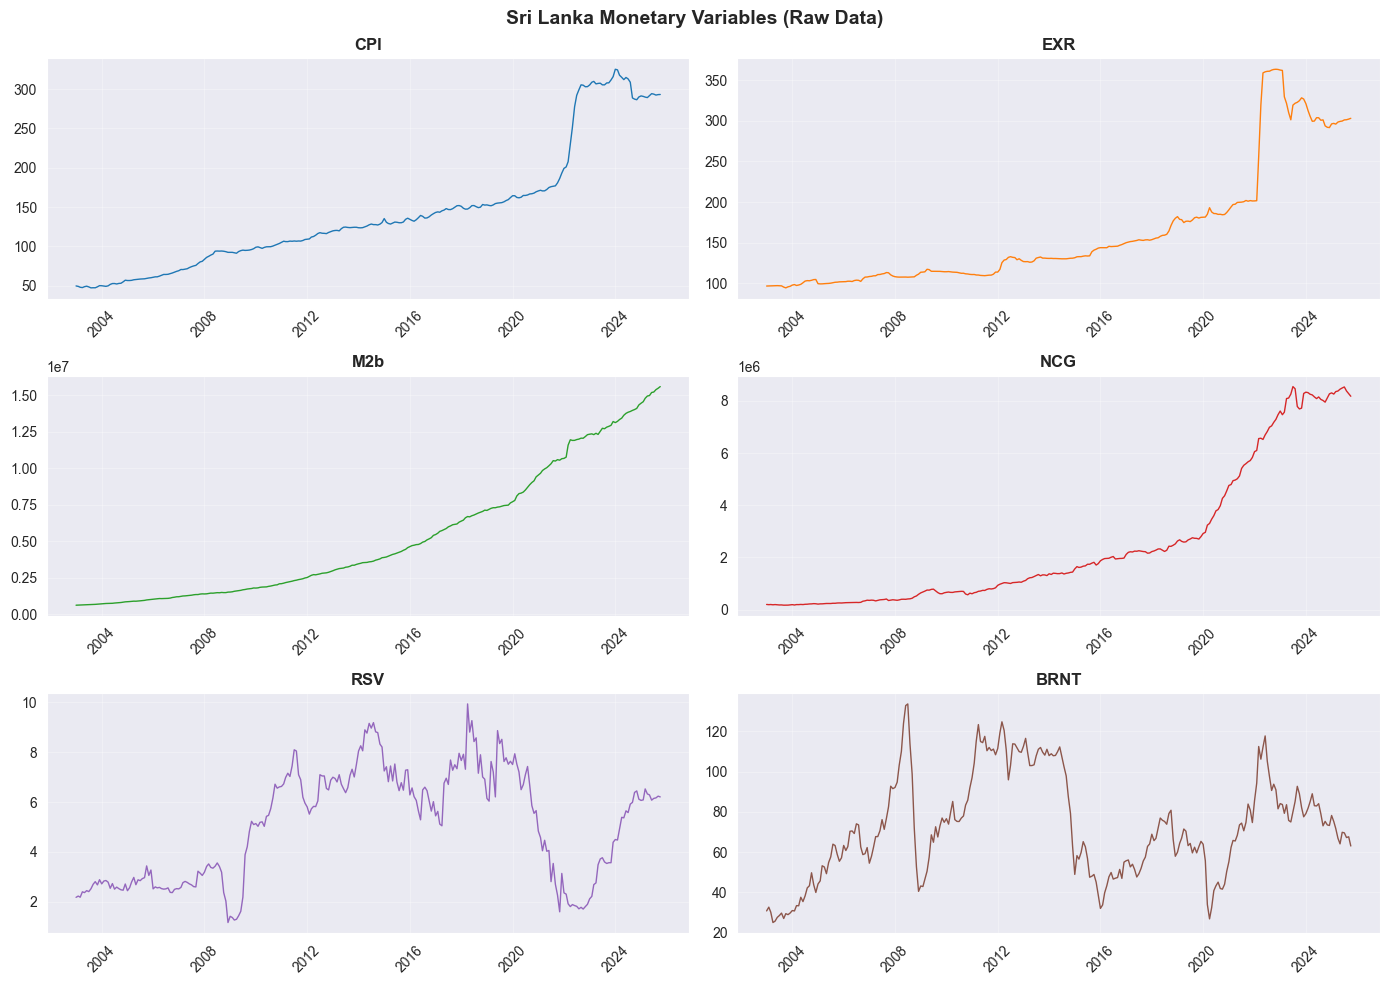

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# --- LOAD AND CLEAN DATA ---

file_path = r"G:\uni\researches\capstone_project\Monetary_transmission_data_III.xlsx"
df = pd.read_excel(file_path, parse_dates=['DATE'])
df.set_index('DATE', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.sort_index()

print("DATA LOADING AND INSPECTION")
print("=" * 60)
print(f"\nShape: {df.shape[0]} rows x {df.shape[1]} columns")
print(f"Period: {df.index[0].strftime('%Y-%m')} to {df.index[-1].strftime('%Y-%m')}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 Rows:\n{df.head()}")
print(f"\nLast 5 Rows:\n{df.tail()}")
print(f"\nDescriptive Statistics:\n{df.describe().round(4)}")

missing = pd.DataFrame({
    'Count': df.isnull().sum(),
    'Pct': (df.isnull().sum() / len(df) * 100).round(2)
})
print(f"\nMissing Values:\n{missing}")

# --- Time series plots ---
variables = ['CPI', 'EXR', 'M2b', 'NCG', 'RSV', 'BRNT']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (var, color) in enumerate(zip(variables, colors)):
    axes[i].plot(df.index, df[var], color=color, linewidth=1)
    axes[i].set_title(var, fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Sri Lanka Monetary Variables (Raw Data)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



VARIABLE TRANSFORMATION AND DERIVED VARIABLES

Descriptive Statistics (Transformed):
                    count    mean     std      min      25%     50%     75%  \
ln_CPI           274.0000  4.8159  0.5281   3.8561   4.5265  4.8407  5.0888   
ln_EXR           274.0000  5.0060  0.3887   4.5487   4.7018  4.8759  5.2039   
ln_M2b           274.0000 15.0645  0.9635  13.3527  14.2144 15.0892 15.8659   
ln_NCG           274.0000 14.0843  1.2172  12.0173  13.0058 14.1390 14.8970   
ln_RSV           274.0000  1.5024  0.5119   0.1570   1.0161  1.7111  1.9308   
ln_BRNT          274.0000  4.2147  0.3795   3.2203   3.9998  4.2549  4.4883   
d_ln_CPI         273.0000  0.0065  0.0157  -0.0669  -0.0018  0.0049  0.0125   
d_ln_EXR         273.0000  0.0042  0.0246  -0.0941  -0.0015  0.0013  0.0061   
d_ln_M2b         273.0000  0.0118  0.0087  -0.0078   0.0062  0.0117  0.0165   
d_ln_NCG         273.0000  0.0137  0.0365  -0.1565  -0.0037  0.0132  0.0322   
d_ln_RSV         273.0000  0.0038  0.1124  -0.

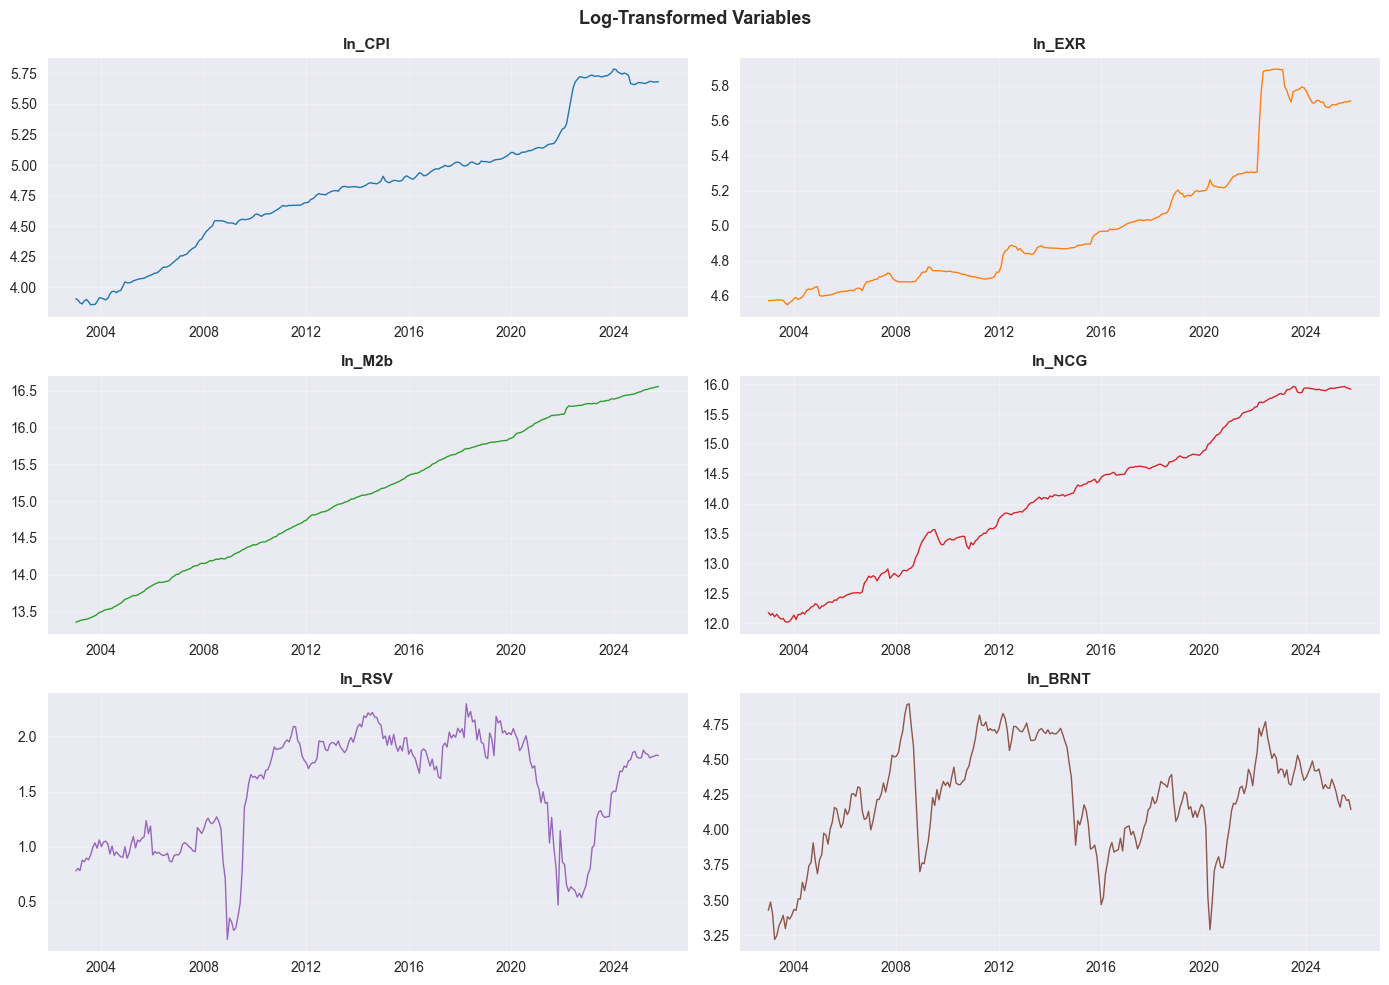

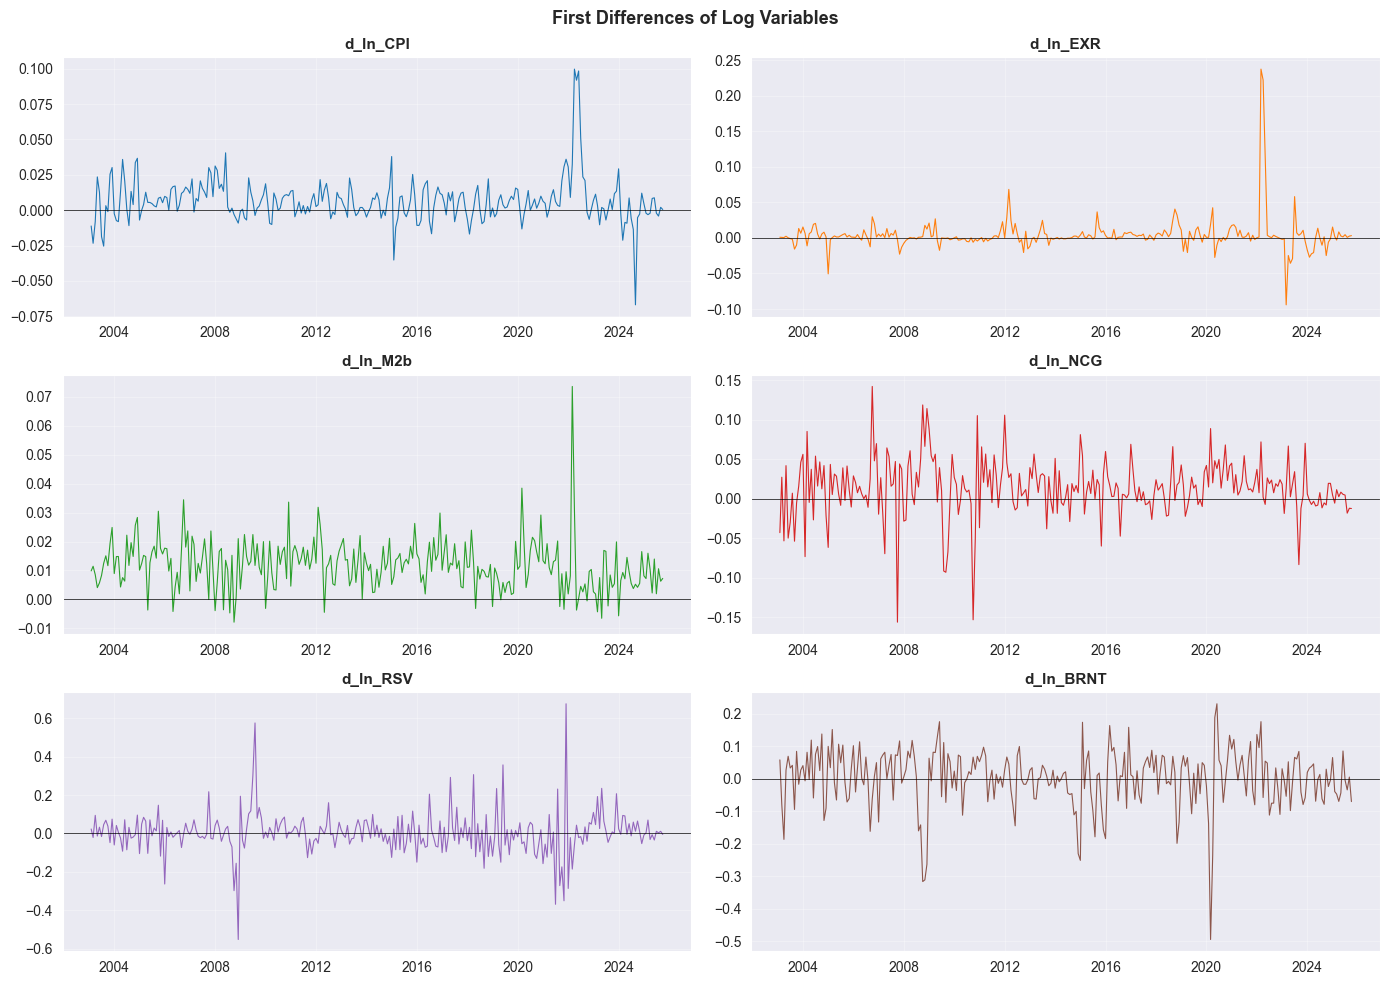

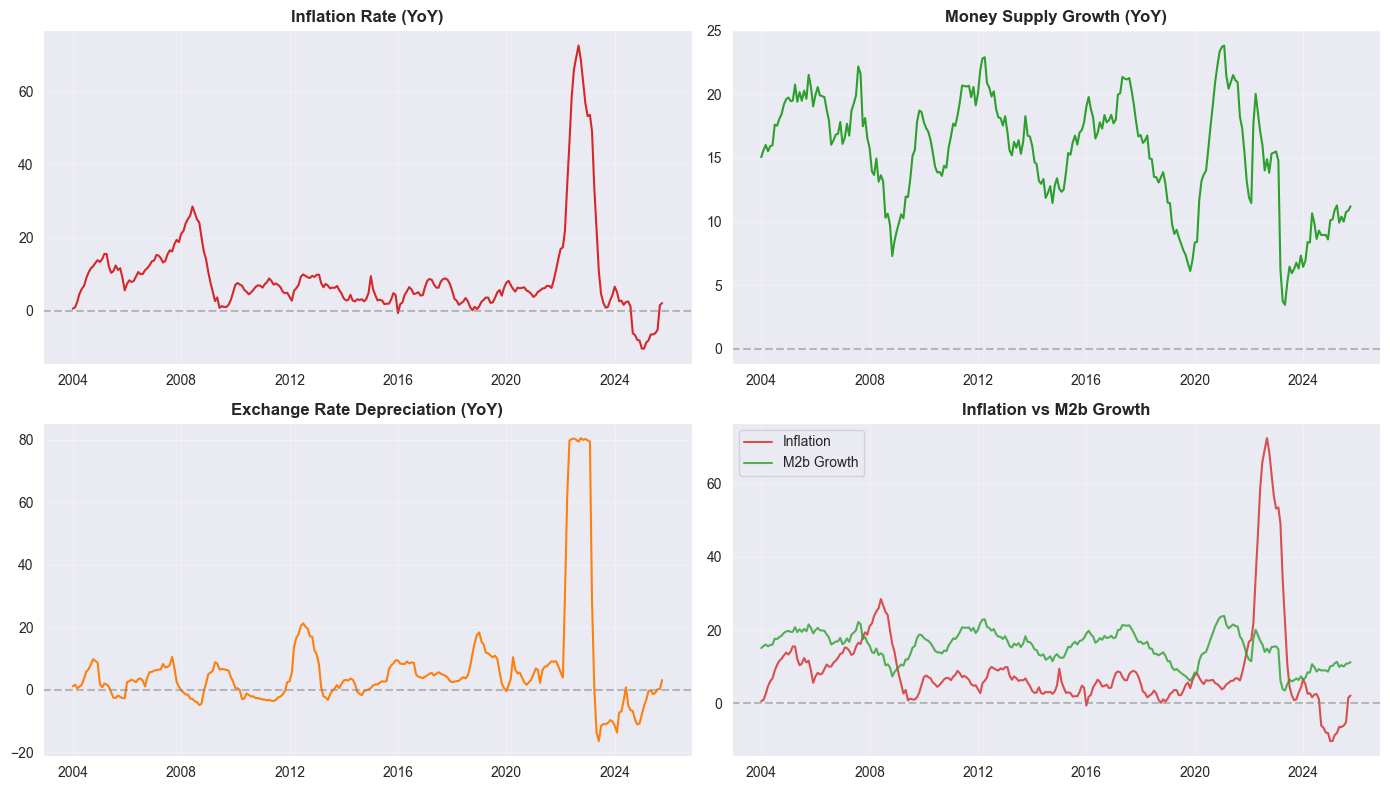

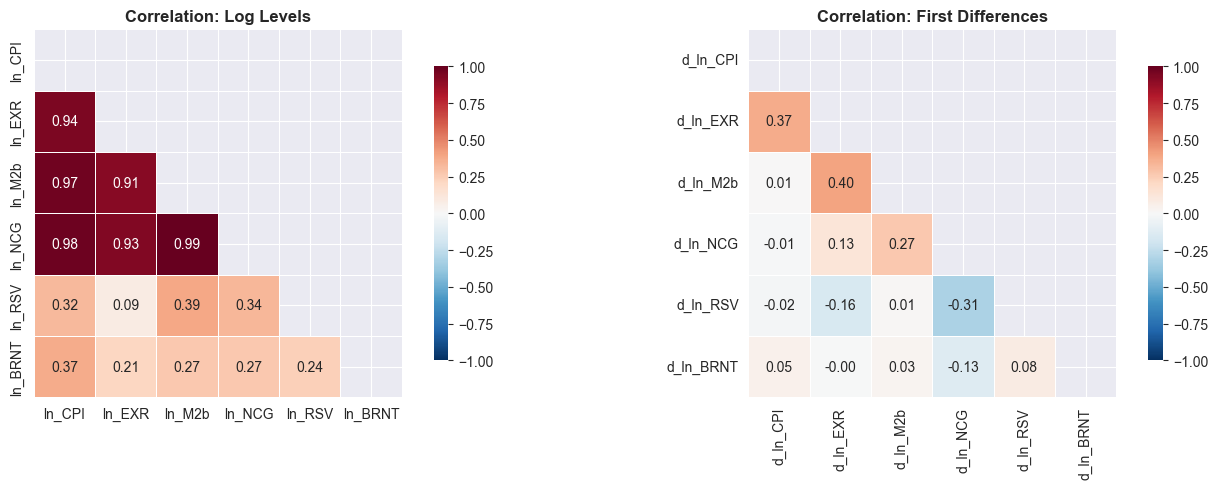


Cross-Correlation Summary (Leader -> Follower):
------------------------------------------------------------
  M2b -> CPI (Monetarist)             | Peak lag:  2 months | CCF: +0.253
  EXR -> CPI (Pass-through)           | Peak lag:  1 months | CCF: +0.548
  M2b -> EXR (Liquidity)              | Peak lag:  0 months | CCF: +0.402
  NCG -> M2b (Fiscal Dominance)       | Peak lag:  0 months | CCF: +0.267
  RSV -> EXR (Reserve Defense)        | Peak lag:  2 months | CCF: -0.189
  BRNT -> CPI (Oil Pass-through)      | Peak lag:  2 months | CCF: +0.200


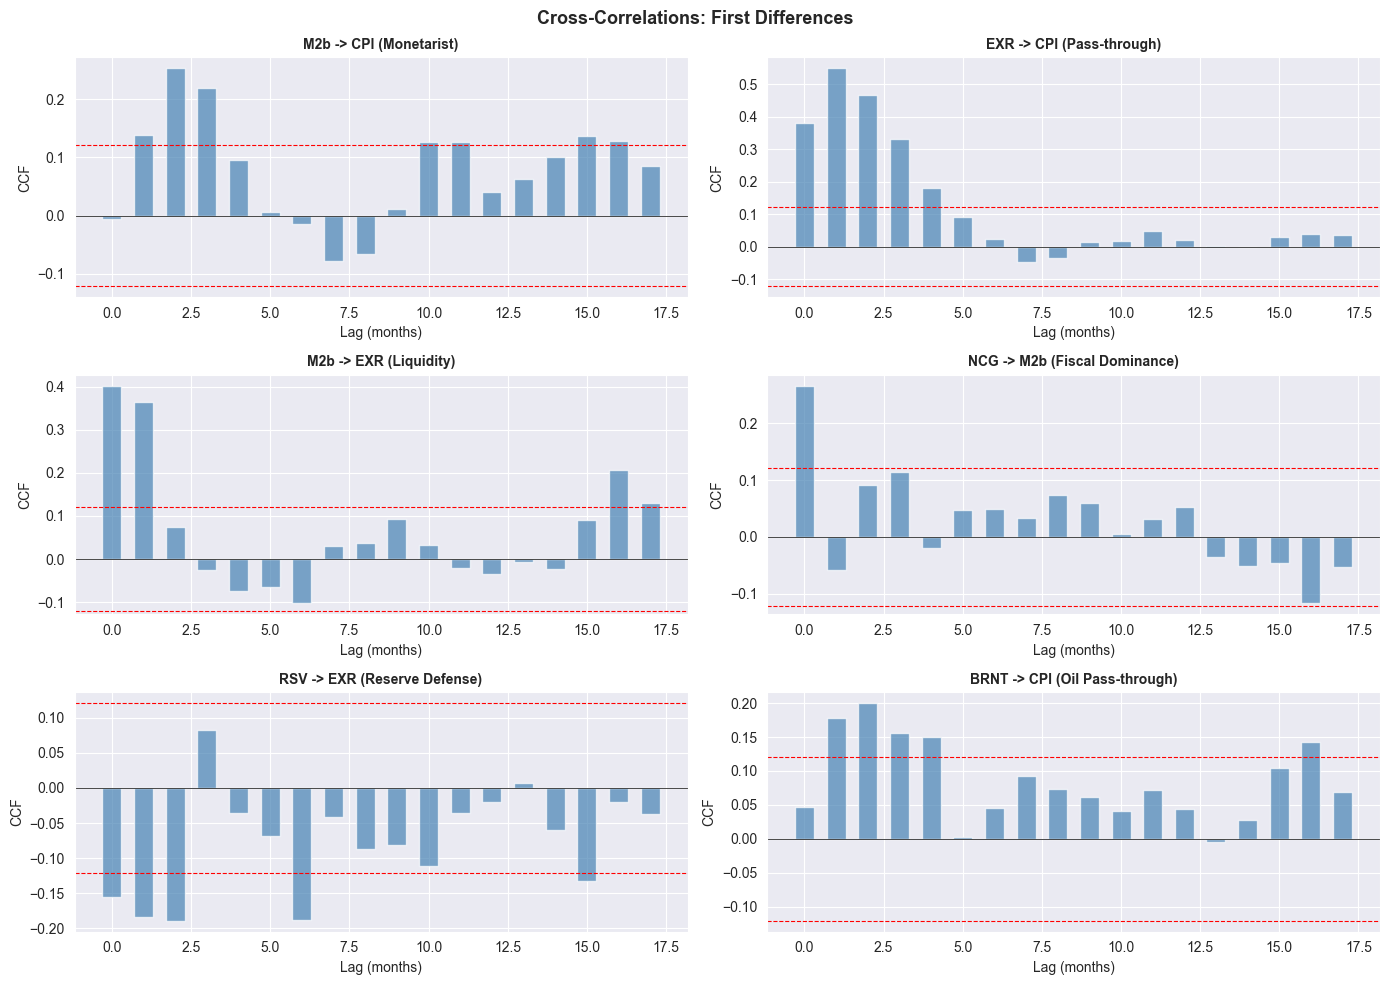

In [4]:
# --- VARIABLE TRANSFORMATION ---

print("VARIABLE TRANSFORMATION AND DERIVED VARIABLES")
print("=" * 60)

# Define variables for transformation
log_vars = ['CPI', 'EXR', 'M2b', 'NCG', 'RSV', 'BRNT']

# Pre-compute column names
log_cols = [f'ln_{v}' for v in log_vars]
diff_cols = [f'd_ln_{v}' for v in log_vars]

# Vectorized log transformations
df_transformed = pd.DataFrame(
    {col: np.log(df[var]) for col, var in zip(log_cols, log_vars)},
    index=df.index
)

# Vectorized first differences
for col, base_col in zip(diff_cols, log_cols):
    df_transformed[col] = df_transformed[base_col].diff()

# Derived growth rates (use direct assignment for clarity)
growth_rate_cols = {
    'INF_YoY': ('CPI', 12),
    'INF_MoM': ('CPI', 1),
    'M2b_Growth': ('M2b', 12),
    'EXR_Depreciation': ('EXR', 12),
    'RSV_Change': ('RSV', 1),
    'NCG_Growth': ('NCG', 12),
    'BRNT_Change': ('BRNT', 12)
}

for col_name, (var, periods) in growth_rate_cols.items():
    df_transformed[col_name] = df[var].pct_change(periods) * 100

print(f"\nDescriptive Statistics (Transformed):")
print(df_transformed.describe().round(4).T)

# --- Correlation Analysis ---
print(f"\nCorrelation Matrix (Log Levels):")
corr_log = df_transformed[log_cols].corr().round(4)
print(corr_log)

print(f"\nCorrelation Matrix (First Differences):")
corr_diff = df_transformed[diff_cols].corr().round(4)
print(corr_diff)

# Pre-define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# --- Plots: Log Levels & First Differences ---
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()
for i, (col, color) in enumerate(zip(log_cols, colors)):
    axes[i].plot(df_transformed.index, df_transformed[col], color=color, linewidth=1)
    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
plt.suptitle('Log-Transformed Variables', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('step2_log_transformed.png', dpi=150, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()
for i, (col, color) in enumerate(zip(diff_cols, colors)):
    axes[i].plot(df_transformed.index, df_transformed[col], color=color, linewidth=0.8)
    axes[i].axhline(y=0, color='black', linewidth=0.5)
    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
plt.suptitle('First Differences of Log Variables', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('step2_first_differences.png', dpi=150, bbox_inches='tight')
plt.show()

# --- Plots: Growth Rates ---
growth_metrics = [
    ('INF_YoY', 'Inflation Rate (YoY)', '#d62728'),
    ('M2b_Growth', 'Money Supply Growth (YoY)', '#2ca02c'),
    ('EXR_Depreciation', 'Exchange Rate Depreciation (YoY)', '#ff7f0e')
]

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for idx, (col, title, color) in enumerate(growth_metrics):
    axes[idx].plot(df_transformed.index, df_transformed[col], color=color, linewidth=1.5)
    axes[idx].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[idx].set_title(title, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

# Comparison plot
axes[3].plot(df_transformed.index, df_transformed['INF_YoY'], 
             color='#d62728', linewidth=1.5, label='Inflation', alpha=0.8)
axes[3].plot(df_transformed.index, df_transformed['M2b_Growth'], 
             color='#2ca02c', linewidth=1.5, label='M2b Growth', alpha=0.8)
axes[3].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[3].set_title('Inflation vs M2b Growth', fontweight='bold')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('step2_growth_rates.png', dpi=150, bbox_inches='tight')
plt.show()

# --- Plots: Correlation Heatmaps (Reuse computed correlations) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

heatmap_params = {'annot': True, 'fmt': '.2f', 'cmap': 'RdBu_r', 
                   'center': 0, 'vmin': -1, 'vmax': 1, 'square': True,
                   'linewidths': 0.5, 'cbar_kws': {'shrink': 0.8}}

mask = np.triu(np.ones_like(corr_log, dtype=bool))
sns.heatmap(corr_log, mask=mask, ax=axes[0], **heatmap_params)
axes[0].set_title('Correlation: Log Levels', fontweight='bold')

mask2 = np.triu(np.ones_like(corr_diff, dtype=bool))
sns.heatmap(corr_diff, mask=mask2, ax=axes[1], **heatmap_params)
axes[1].set_title('Correlation: First Differences', fontweight='bold')

plt.tight_layout()
plt.savefig('step2_correlation_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

# --- Cross Correlation Functions ---
from statsmodels.tsa.stattools import ccf

pairs = [
    ('d_ln_M2b', 'd_ln_CPI', 'M2b -> CPI (Monetarist)'),
    ('d_ln_EXR', 'd_ln_CPI', 'EXR -> CPI (Pass-through)'),
    ('d_ln_M2b', 'd_ln_EXR', 'M2b -> EXR (Liquidity)'),
    ('d_ln_NCG', 'd_ln_M2b', 'NCG -> M2b (Fiscal Dominance)'),
    ('d_ln_RSV', 'd_ln_EXR', 'RSV -> EXR (Reserve Defense)'),
    ('d_ln_BRNT', 'd_ln_CPI', 'BRNT -> CPI (Oil Pass-through)')
]

max_lag = 18
df_clean = df_transformed.dropna()
ci = 1.96 / np.sqrt(len(df_clean))

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

print("\nCross-Correlation Summary (Leader -> Follower):")
print("-" * 60)

for i, (leader, follower, label) in enumerate(pairs):
    cc_values = ccf(df_clean[follower], df_clean[leader], nlags=max_lag)
    lags = np.arange(len(cc_values))
    
    peak_lag = np.argmax(np.abs(cc_values))
    peak_val = cc_values[peak_lag]
    
    axes[i].bar(lags, cc_values, color='steelblue', alpha=0.7, width=0.6)
    axes[i].axhline(y=ci, color='red', linestyle='--', linewidth=0.8)
    axes[i].axhline(y=-ci, color='red', linestyle='--', linewidth=0.8)
    axes[i].axhline(y=0, color='black', linewidth=0.5)
    axes[i].set_title(label, fontweight='bold', fontsize=10)
    axes[i].set_xlabel('Lag (months)')
    axes[i].set_ylabel('CCF')
    
    print(f"  {label:35s} | Peak lag: {peak_lag:2d} months | CCF: {peak_val:+.3f}")

plt.suptitle('Cross-Correlations: First Differences', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('step2_cross_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

STATIONARITY TESTING

ADF Results (Levels):
Variable  ADF_Statistic  P_Value  Lags_Used  N_Obs   CV_1%   CV_5%  CV_10% Stationary
  ln_CPI        -2.7971   0.1980          5    268 -3.9930 -3.4270 -3.1368         No
  ln_EXR        -2.3243   0.4206          2    271 -3.9926 -3.4268 -3.1366         No
  ln_M2b        -1.2552   0.8986         12    261 -3.9939 -3.4274 -3.1370         No
  ln_RSV        -2.6767   0.2459          4    269 -3.9928 -3.4269 -3.1367         No
 ln_BRNT        -3.0234   0.1257          1    272 -3.9924 -3.4268 -3.1366         No

KPSS Results (Levels):
Variable  KPSS_Statistic P_Value  Lags_Used  CV_1%  CV_5%  CV_10% Stationary
  ln_CPI          0.2133  0.0110         10 0.2160 0.1460  0.1190         No
  ln_EXR          0.4595   <0.01         10 0.2160 0.1460  0.1190         No
  ln_M2b          0.3943   <0.01         10 0.2160 0.1460  0.1190         No
  ln_RSV          0.3705   <0.01         10 0.2160 0.1460  0.1190         No
 ln_BRNT          0.2543   <0.0

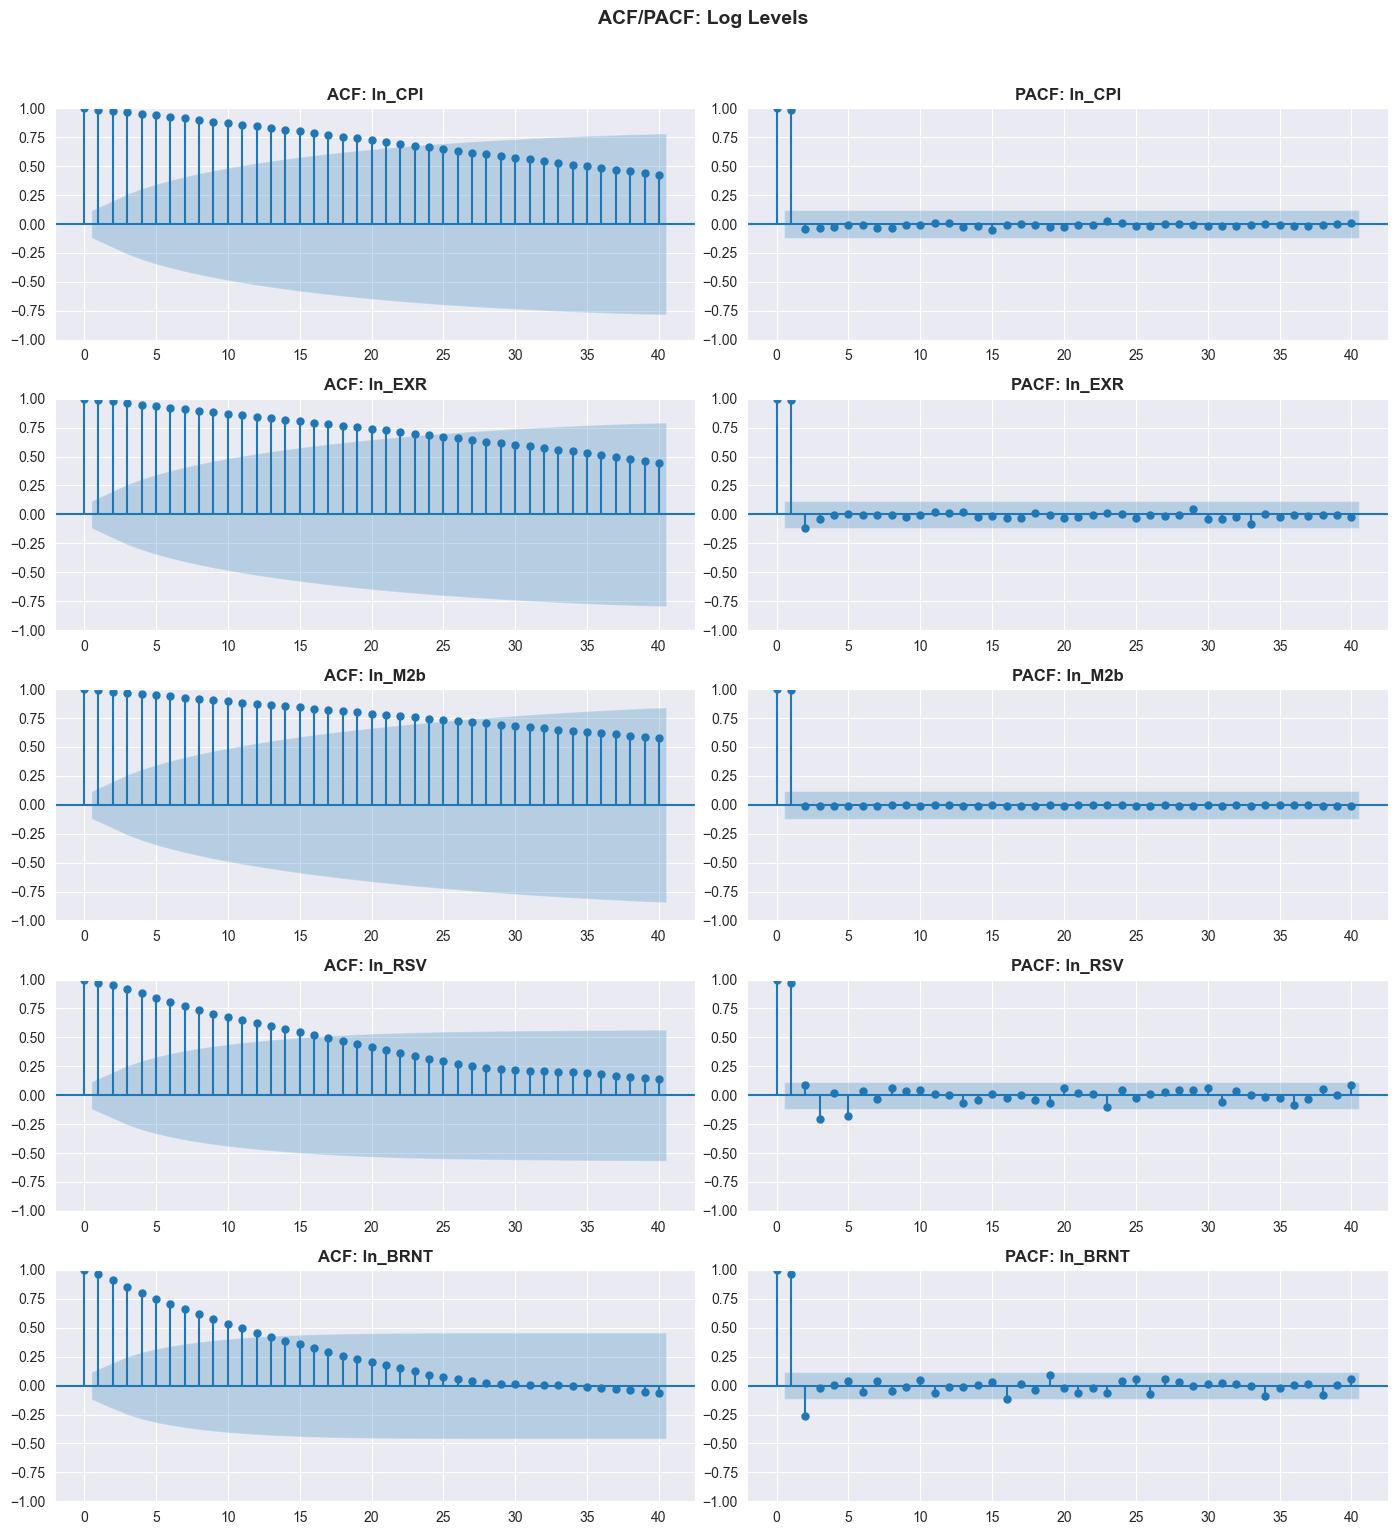

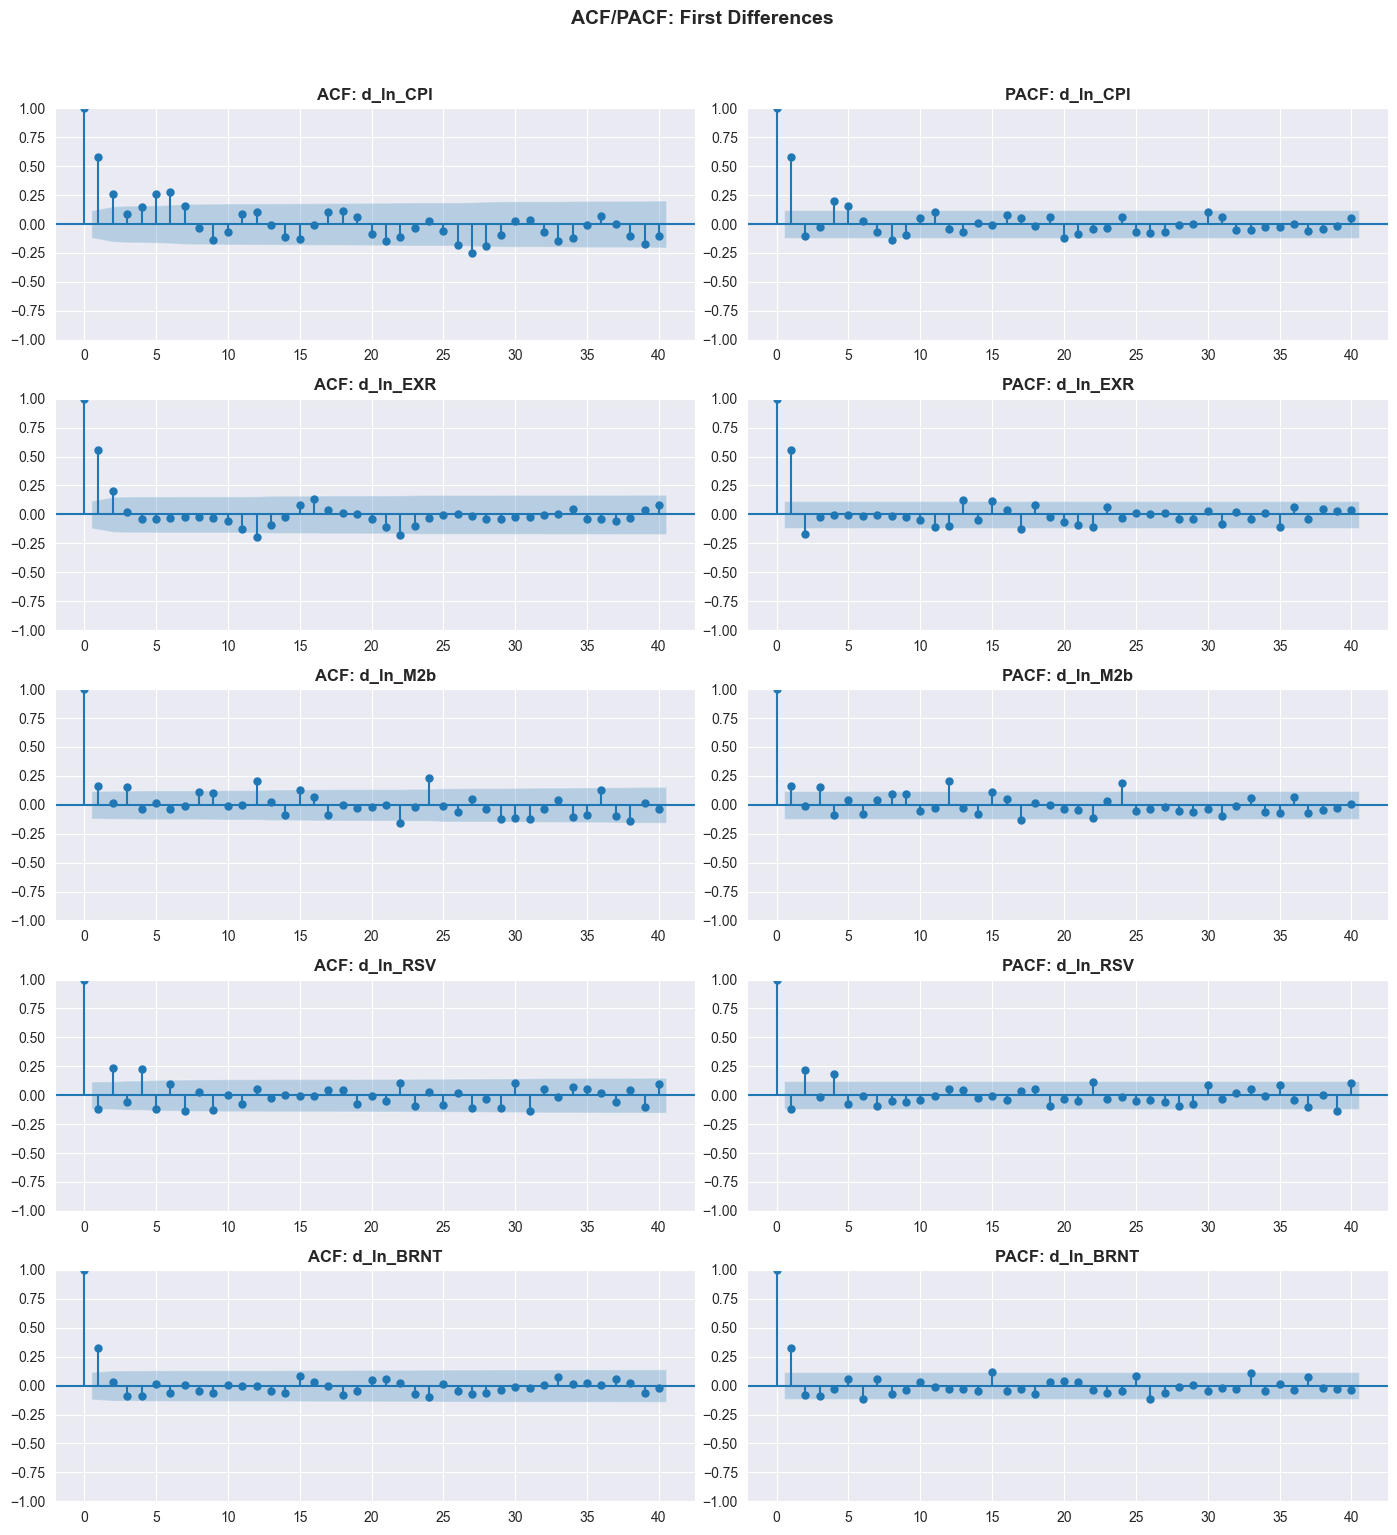

In [5]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

print("STATIONARITY TESTING")
print("=" * 60)

def adf_test(series, variable_name, significance=0.05):
    series_clean = series.dropna()
    result = adfuller(series_clean, autolag='AIC', regression='ct')
    return {
        'Variable': variable_name,
        'ADF_Statistic': round(result[0], 4),
        'P_Value': round(result[1], 4),
        'Lags_Used': result[2],
        'N_Obs': result[3],
        'CV_1%': round(result[4]['1%'], 4),
        'CV_5%': round(result[4]['5%'], 4),
        'CV_10%': round(result[4]['10%'], 4),
        'Stationary': 'Yes' if result[1] < significance else 'No'
    }

def kpss_test(series, variable_name, significance=0.05):
    series_clean = series.dropna()
    result = kpss(series_clean, regression='ct', nlags='auto')
    return {
        'Variable': variable_name,
        'KPSS_Statistic': round(result[0], 4),
        'P_Value': round(result[1], 4) if result[1] > 0.01 else '<0.01',
        'Lags_Used': result[2],
        'CV_1%': round(result[3]['1%'], 4),
        'CV_5%': round(result[3]['5%'], 4),
        'CV_10%': round(result[3]['10%'], 4),
        'Stationary': 'Yes' if result[1] > significance else 'No'
    }

def combined_test(series, variable_name):
    adf = adf_test(series, variable_name)
    kpss_r = kpss_test(series, variable_name)
    adf_s = adf['Stationary'] == 'Yes'
    kpss_s = kpss_r['Stationary'] == 'Yes'

    if adf_s and kpss_s:
        conclusion = 'Stationary'
    elif not adf_s and not kpss_s:
        conclusion = 'Non-Stationary'
    elif adf_s and not kpss_s:
        conclusion = 'Trend-Stationary'
    else:
        conclusion = 'Difference-Stationary'

    return adf, kpss_r, conclusion

# NCG removed from both lists
log_vars = ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
diff_vars = ['d_ln_CPI', 'd_ln_EXR', 'd_ln_M2b', 'd_ln_RSV', 'd_ln_BRNT']

# Test levels
adf_levels, kpss_levels, concl_levels = [], [], []
for var in log_vars:
    adf, kpss_r, concl = combined_test(df_transformed[var], var)
    adf_levels.append(adf)
    kpss_levels.append(kpss_r)
    concl_levels.append({'Variable': var, 'ADF': adf['Stationary'],
                         'KPSS': kpss_r['Stationary'], 'Conclusion': concl})

print("\nADF Results (Levels):")
print(pd.DataFrame(adf_levels).to_string(index=False))
print("\nKPSS Results (Levels):")
print(pd.DataFrame(kpss_levels).to_string(index=False))
print("\nCombined Conclusion (Levels):")
print(pd.DataFrame(concl_levels).to_string(index=False))

# Test first differences
adf_diffs, kpss_diffs, concl_diffs = [], [], []
for var in diff_vars:
    adf, kpss_r, concl = combined_test(df_transformed[var], var)
    adf_diffs.append(adf)
    kpss_diffs.append(kpss_r)
    concl_diffs.append({'Variable': var, 'ADF': adf['Stationary'],
                        'KPSS': kpss_r['Stationary'], 'Conclusion': concl})

print("\nADF Results (First Differences):")
print(pd.DataFrame(adf_diffs).to_string(index=False))
print("\nKPSS Results (First Differences):")
print(pd.DataFrame(kpss_diffs).to_string(index=False))
print("\nCombined Conclusion (First Differences):")
print(pd.DataFrame(concl_diffs).to_string(index=False))

# Integration order summary
print("\n" + "=" * 60)
print("INTEGRATION ORDER SUMMARY")
print("=" * 60)
integration = []
for i, var in enumerate(log_vars):
    lev_stat = concl_levels[i]['Conclusion'] == 'Stationary'
    dif_stat = concl_diffs[i]['Conclusion'] in ['Stationary', 'Trend-Stationary']
    order = 'I(0)' if lev_stat else ('I(1)' if dif_stat else 'I(2)+')
    integration.append({
        'Variable': var.replace('ln_', ''),
        'Level': concl_levels[i]['Conclusion'],
        'First_Diff': concl_diffs[i]['Conclusion'],
        'Order': order
    })

print(pd.DataFrame(integration).to_string(index=False))

# ACF/PACF plots — Levels (5 variables now)
fig, axes = plt.subplots(len(log_vars), 2, figsize=(14, 15))
for i, var in enumerate(log_vars):
    s = df_transformed[var].dropna()
    plot_acf(s, ax=axes[i, 0], lags=40, alpha=0.05)
    axes[i, 0].set_title(f'ACF: {var}', fontweight='bold')
    plot_pacf(s, ax=axes[i, 1], lags=40, alpha=0.05, method='ywm')
    axes[i, 1].set_title(f'PACF: {var}', fontweight='bold')
plt.suptitle('ACF/PACF: Log Levels', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('step3_acf_pacf_levels.png', dpi=150, bbox_inches='tight')
plt.show()

# ACF/PACF plots — First Differences (5 variables now)
fig, axes = plt.subplots(len(diff_vars), 2, figsize=(14, 15))
for i, var in enumerate(diff_vars):
    s = df_transformed[var].dropna()
    plot_acf(s, ax=axes[i, 0], lags=40, alpha=0.05)
    axes[i, 0].set_title(f'ACF: {var}', fontweight='bold')
    plot_pacf(s, ax=axes[i, 1], lags=40, alpha=0.05, method='ywm')
    axes[i, 1].set_title(f'PACF: {var}', fontweight='bold')
plt.suptitle('ACF/PACF: First Differences', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('step3_acf_pacf_diff.png', dpi=150, bbox_inches='tight')
plt.show()

In [6]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen, select_coint_rank, VECM
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("LAG SELECTION AND JOHANSEN COINTEGRATION TEST")
print("=" * 60)

# 5 endogenous variables (NCG dropped due to 0.994 collinearity with M2b)
coint_vars = ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
data_coint = df_transformed[coint_vars].dropna()

print(f"Variables: {coint_vars}")
print(f"Observations: {len(data_coint)}")
print(f"Period: {data_coint.index[0].strftime('%Y-%m')} to {data_coint.index[-1].strftime('%Y-%m')}")

# LAG SELECTION
model_var = VAR(data_coint)
lag_results = model_var.select_order(maxlags=12)
print("\n" + str(lag_results.summary()))

aic_lag = lag_results.aic
bic_lag = lag_results.bic

print(f"\nLag Selection: AIC={aic_lag}, BIC={bic_lag}")

k_ar_diff_aic = max(1, aic_lag - 1)
k_ar_diff_bic = max(1, bic_lag - 1)

print(f"Johansen k_ar_diff: AIC-based={k_ar_diff_aic}, BIC-based={k_ar_diff_bic}")

# JOHANSEN TEST
det_order = 1
n_vars = len(coint_vars)

def run_johansen_test(data, det_order, k_ar_diff, label):
    print(f"\n{'=' * 60}")
    print(f"JOHANSEN TEST — {label} (det_order={det_order}, k_ar_diff={k_ar_diff})")
    print(f"{'=' * 60}")

    joh = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff)
    trace_stats, trace_cvs = joh.lr1, joh.cvt[:, 1]
    maxeig_stats, maxeig_cvs = joh.lr2, joh.cvm[:, 1]

    print("\nTrace Test:")
    print(f"  {'H0':<8} {'Stat':>10} {'5% CV':>10} {'Reject':>8}")
    print("  " + "-" * 40)
    for i in range(n_vars):
        reject = 'Yes' if trace_stats[i] > trace_cvs[i] else 'No'
        print(f"  r <= {i:<3} {trace_stats[i]:>10.4f} {trace_cvs[i]:>10.4f} {reject:>8}")

    print("\nMax-Eigenvalue Test:")
    print(f"  {'H0':<8} {'Stat':>10} {'5% CV':>10} {'Reject':>8}")
    print("  " + "-" * 40)
    for i in range(n_vars):
        reject = 'Yes' if maxeig_stats[i] > maxeig_cvs[i] else 'No'
        print(f"  r = {i:<4} {maxeig_stats[i]:>10.4f} {maxeig_cvs[i]:>10.4f} {reject:>8}")

    print(f"\nEigenvalues: {np.round(joh.eig, 4)}")

    trace_rank = 0
    for i in range(n_vars):
        if trace_stats[i] > trace_cvs[i]:
            trace_rank = i + 1
        else:
            break

    maxeig_rank = 0
    for i in range(n_vars):
        if maxeig_stats[i] > maxeig_cvs[i]:
            maxeig_rank = i + 1
        else:
            break

    print(f"\n  Trace rank: {trace_rank}, Max-Eigen rank: {maxeig_rank}")

    try:
        rank_check = select_coint_rank(data, det_order=det_order,
                                        k_ar_diff=k_ar_diff, method='trace', signif=0.05)
        print(f"  select_coint_rank verification: {rank_check.rank}")
    except:
        pass

    return joh, trace_rank, maxeig_rank

# Run both lag specifications
joh_aic, trace_rank_aic, maxeig_rank_aic = run_johansen_test(
    data_coint, det_order, k_ar_diff_aic, f"AIC (k_ar_diff={k_ar_diff_aic})")

joh_bic, trace_rank_bic, maxeig_rank_bic = run_johansen_test(
    data_coint, det_order, k_ar_diff_bic, f"BIC (k_ar_diff={k_ar_diff_bic})")

# RANK STABILITY
print(f"\n{'=' * 60}")
print("RANK STABILITY")
print(f"{'=' * 60}")
print(f"  {'Spec':<10} {'k_ar_diff':<12} {'Trace':<10} {'MaxEig':<10}")
print("  " + "-" * 40)
print(f"  {'AIC':<10} {k_ar_diff_aic:<12} {trace_rank_aic:<10} {maxeig_rank_aic:<10}")
print(f"  {'BIC':<10} {k_ar_diff_bic:<12} {trace_rank_bic:<10} {maxeig_rank_bic:<10}")

rank_stable = (trace_rank_aic == trace_rank_bic)
print(f"\n  Stable: {'Yes' if rank_stable else 'No'}")

# Cointegrating vectors (preliminary)
coint_rank_primary = trace_rank_aic
if coint_rank_primary > 0:
    beta = joh_aic.evec[:, :max(coint_rank_primary, 2)]
    beta_norm = beta / beta[0, :]
    n_show = min(max(coint_rank_primary, 2), n_vars)
    print(f"\nNormalized Cointegrating Vectors (on CPI):")
    print(pd.DataFrame(beta_norm[:, :n_show], index=coint_vars,
                        columns=[f'CV{i+1}' for i in range(n_show)]).round(4))

# VECM ESTIMATION — RANK COMPARISON
print(f"\n{'=' * 60}")
print("VECM ESTIMATION: RANK=1 vs RANK=2")
print(f"{'=' * 60}")

vecm_lag = k_ar_diff_aic
diagnostics_summary = {}

for rank in [1, 2]:
    print(f"\n{'-' * 60}")
    print(f"VECM: rank={rank}, k_ar_diff={vecm_lag}, no exogenous")
    print(f"{'-' * 60}")

    try:
        vecm_model = VECM(data_coint, k_ar_diff=vecm_lag, coint_rank=rank,
                          deterministic='ci')
        vecm_fit = vecm_model.fit()

        resid = vecm_fit.resid
        n_obs, n_eq = resid.shape

        # Information criteria
        sigma = np.cov(resid.T)
        log_det_sigma = np.log(np.linalg.det(sigma))
        k_total_per_eq = vecm_lag * n_eq + rank + 1
        k_total = k_total_per_eq * n_eq
        aic_val = log_det_sigma + 2 * k_total / n_obs
        bic_val = log_det_sigma + np.log(n_obs) * k_total / n_obs
        hqic_val = log_det_sigma + 2 * np.log(np.log(n_obs)) * k_total / n_obs

        print(f"\n  Obs: {n_obs}, Equations: {n_eq}, Params/eq: {k_total_per_eq}, Total: {k_total}")
        print(f"  Log|Σ|={log_det_sigma:.4f}, AIC={aic_val:.4f}, BIC={bic_val:.4f}, HQIC={hqic_val:.4f}")

        # Residual diagnostics
        print(f"\n  Residual Diagnostics:")
        print(f"    {'Variable':<12} {'Skew':>8} {'Kurt':>8} {'JB p':>8} {'LB(12) p':>10}")
        print("    " + "-" * 50)

        jb_pvals, lb_pvals, normality_ok = [], [], []

        for j, var in enumerate(coint_vars):
            r = resid[:, j]
            r_skew = stats.skew(r)
            r_kurt = stats.kurtosis(r, fisher=True)
            jb_stat, jb_p = stats.jarque_bera(r)
            lb_p = acorr_ljungbox(r, lags=[12], return_df=True)['lb_pvalue'].values[0]

            jb_pvals.append(jb_p)
            lb_pvals.append(lb_p)
            normality_ok.append(jb_p > 0.05)

            print(f"    {var:<12} {r_skew:>8.3f} {r_kurt:>8.3f} {jb_p:>8.4f} {lb_p:>10.4f}")

        jb_joint_stat = sum([stats.jarque_bera(resid[:, j])[0] for j in range(n_eq)])
        jb_joint_p = 1 - stats.chi2.cdf(jb_joint_stat, df=2 * n_eq)
        all_lb_pass = all(p > 0.05 for p in lb_pvals)

        print(f"\n    Joint Normality: p={jb_joint_p:.4f} ({'Pass' if jb_joint_p > 0.05 else 'Fail'})")
        print(f"    Serial Corr (LB12): {'All pass' if all_lb_pass else 'Some fail'}")

        # Multivariate Portmanteau
        max_h = 12
        T = n_obs
        Q_stat = 0
        C_0 = (resid.T @ resid) / T
        C_0_inv = np.linalg.inv(C_0)
        for h in range(1, max_h + 1):
            C_h = (resid[h:].T @ resid[:-h]) / T
            Q_stat += np.trace(C_h.T @ C_0_inv @ C_h @ C_0_inv) / (T - h)
        Q_stat *= T * T
        port_df = n_eq * n_eq * (max_h - vecm_lag)
        port_p = 1 - stats.chi2.cdf(Q_stat, df=max(port_df, 1))
        print(f"    Portmanteau(h={max_h}): Q={Q_stat:.1f}, df={port_df}, p={port_p:.4f}")

        # Error correction coefficients
        alpha = vecm_fit.alpha
        print(f"\n  Alpha (error correction speeds):")
        alpha_df = pd.DataFrame(alpha, index=coint_vars,
                                columns=[f'EC{i+1}' for i in range(rank)])
        print(alpha_df.round(4).to_string(col_space=10))

        if hasattr(vecm_fit, 'stderr_alpha') and vecm_fit.stderr_alpha is not None:
            t_alpha = alpha / vecm_fit.stderr_alpha
            print(f"\n  Alpha t-statistics:")
            print(pd.DataFrame(t_alpha, index=coint_vars,
                                columns=[f'EC{i+1}' for i in range(rank)]).round(3).to_string(col_space=10))
            print(f"\n  Significant at 5% (|t|>1.96):")
            print(pd.DataFrame(np.abs(t_alpha) > 1.96, index=coint_vars,
                                columns=[f'EC{i+1}' for i in range(rank)]).to_string(col_space=10))

        # Cointegrating vectors
        beta_est = vecm_fit.beta
        beta_norm_est = beta_est / beta_est[0, :]
        n_beta_rows = beta_est.shape[0]
        idx = coint_vars + ['const'] if n_beta_rows > n_eq else coint_vars
        print(f"\n  Beta (normalized on CPI):")
        print(pd.DataFrame(beta_norm_est, index=idx[:n_beta_rows],
                            columns=[f'CV{i+1}' for i in range(rank)]).round(4).to_string(col_space=10))

        diagnostics_summary[rank] = {
            'aic': aic_val, 'bic': bic_val, 'hqic': hqic_val,
            'log_det_sigma': log_det_sigma,
            'jb_joint_p': jb_joint_p, 'lb_pvals': lb_pvals,
            'portmanteau_p': port_p, 'all_lb_pass': all_lb_pass,
            'n_eq_normal': f"{sum(normality_ok)}/{n_eq}",
        }

    except Exception as e:
        print(f"  ERROR: {e}")
        import traceback
        traceback.print_exc()
        diagnostics_summary[rank] = {'error': str(e)}

# COMPARISON TABLE
print(f"\n{'=' * 60}")
print("DIAGNOSTIC COMPARISON: RANK=1 vs RANK=2")
print(f"{'=' * 60}")

if all('error' not in diagnostics_summary.get(r, {}) for r in [1, 2]):
    d1, d2 = diagnostics_summary[1], diagnostics_summary[2]

    print(f"\n  {'Criterion':<30} {'Rank=1':>15} {'Rank=2':>15} {'Preferred':>12}")
    print("  " + "-" * 75)

    for name, key in [('AIC','aic'), ('BIC','bic'), ('HQIC','hqic'), ('Log|Σ|','log_det_sigma')]:
        pref = 'Rank=1' if d1[key] < d2[key] else 'Rank=2'
        print(f"  {name:<30} {d1[key]:>15.4f} {d2[key]:>15.4f} {pref:>12}")

    print(f"  {'Eq. normal (5%)':<30} {d1['n_eq_normal']:>15} {d2['n_eq_normal']:>15} {'—':>12}")

    for name, key in [('Joint Normality','jb_joint_p'), ('Portmanteau','portmanteau_p')]:
        v1 = f"{'Pass' if d1[key] > 0.05 else 'Fail'} ({d1[key]:.3f})"
        v2 = f"{'Pass' if d2[key] > 0.05 else 'Fail'} ({d2[key]:.3f})"
        print(f"  {name:<30} {v1:>15} {v2:>15} {'—':>12}")

    sc1 = 'Pass' if d1['all_lb_pass'] else 'Fail'
    sc2 = 'Pass' if d2['all_lb_pass'] else 'Fail'
    print(f"  {'Serial corr (LB12)':<30} {sc1:>15} {sc2:>15} {'—':>12}")

    ic_votes = sum([d1[k] < d2[k] for k in ['aic','bic','hqic']])
    recommended = 1 if ic_votes >= 2 else 2
    print(f"\n  IC votes for Rank=1: {ic_votes}/3")
    print(f"  Rank stable: {'Yes' if rank_stable else 'No'}")
    print(f"  RECOMMENDED RANK: {recommended}")

# FINAL SUMMARY
print(f"\n{'=' * 60}")
print("FINAL SUMMARY")
print(f"{'=' * 60}")
print(f"  Trace rank (AIC): {trace_rank_aic}, Trace rank (BIC): {trace_rank_bic}")
print(f"  Rank stable: {'Yes' if rank_stable else 'No'}")
print(f"  VAR lag: AIC={aic_lag}, BIC={bic_lag}")
print(f"  VECM k_ar_diff: {k_ar_diff_aic}")
print(f"  Model: VECM")
print(f"  All endogenous: {coint_vars}")
print(f"  No exogenous variables")

LAG SELECTION AND JOHANSEN COINTEGRATION TEST
Variables: ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
Observations: 274
Period: 2003-01 to 2025-10

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -13.24      -13.17   1.776e-06      -13.21
1       -35.11      -34.70   5.638e-16      -34.95
2       -35.89     -35.14*   2.601e-16     -35.58*
3       -35.88      -34.79   2.616e-16      -35.44
4      -35.95*      -34.52  2.442e-16*      -35.38
5       -35.93      -34.16   2.488e-16      -35.22
6       -35.87      -33.76   2.657e-16      -35.02
7       -35.82      -33.37   2.801e-16      -34.83
8       -35.73      -32.94   3.064e-16      -34.61
9       -35.68      -32.55   3.257e-16      -34.42
10      -35.61      -32.14   3.511e-16      -34.21
11      -35.57      -31.76   3.683e-16      -34.04
12      -35.52      -31.36   3.933e-16      -33.85
-----------------------------

VECM ESTIMATION AND DIAGNOSTICS
Rank: 1, k_ar_diff: 3
Variables: ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
Observations: 274
Det. terms outside the coint. relation & lagged endog. parameters for equation ln_CPI
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.ln_CPI      0.4471      0.061      7.374      0.000       0.328       0.566
L1.ln_EXR      0.2115      0.042      5.076      0.000       0.130       0.293
L1.ln_M2b      0.0700      0.091      0.768      0.442      -0.109       0.249
L1.ln_RSV      0.0001      0.006      0.021      0.984      -0.013       0.013
L1.ln_BRNT     0.0182      0.008      2.174      0.030       0.002       0.035
L2.ln_CPI     -0.0801      0.066     -1.210      0.226      -0.210       0.050
L2.ln_EXR     -0.0752      0.046     -1.618      0.106      -0.166       0.016
L2.ln_M2b      0.2455      0.092      2.680      0.007       0.066  

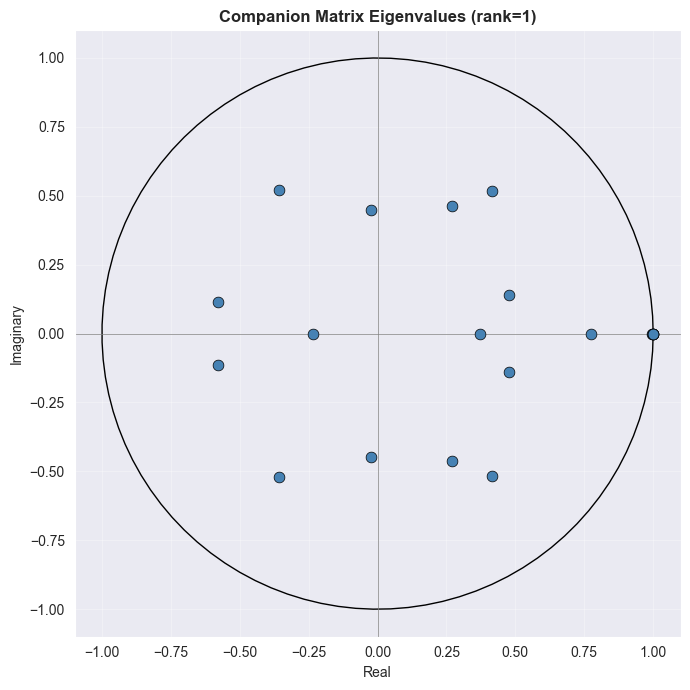

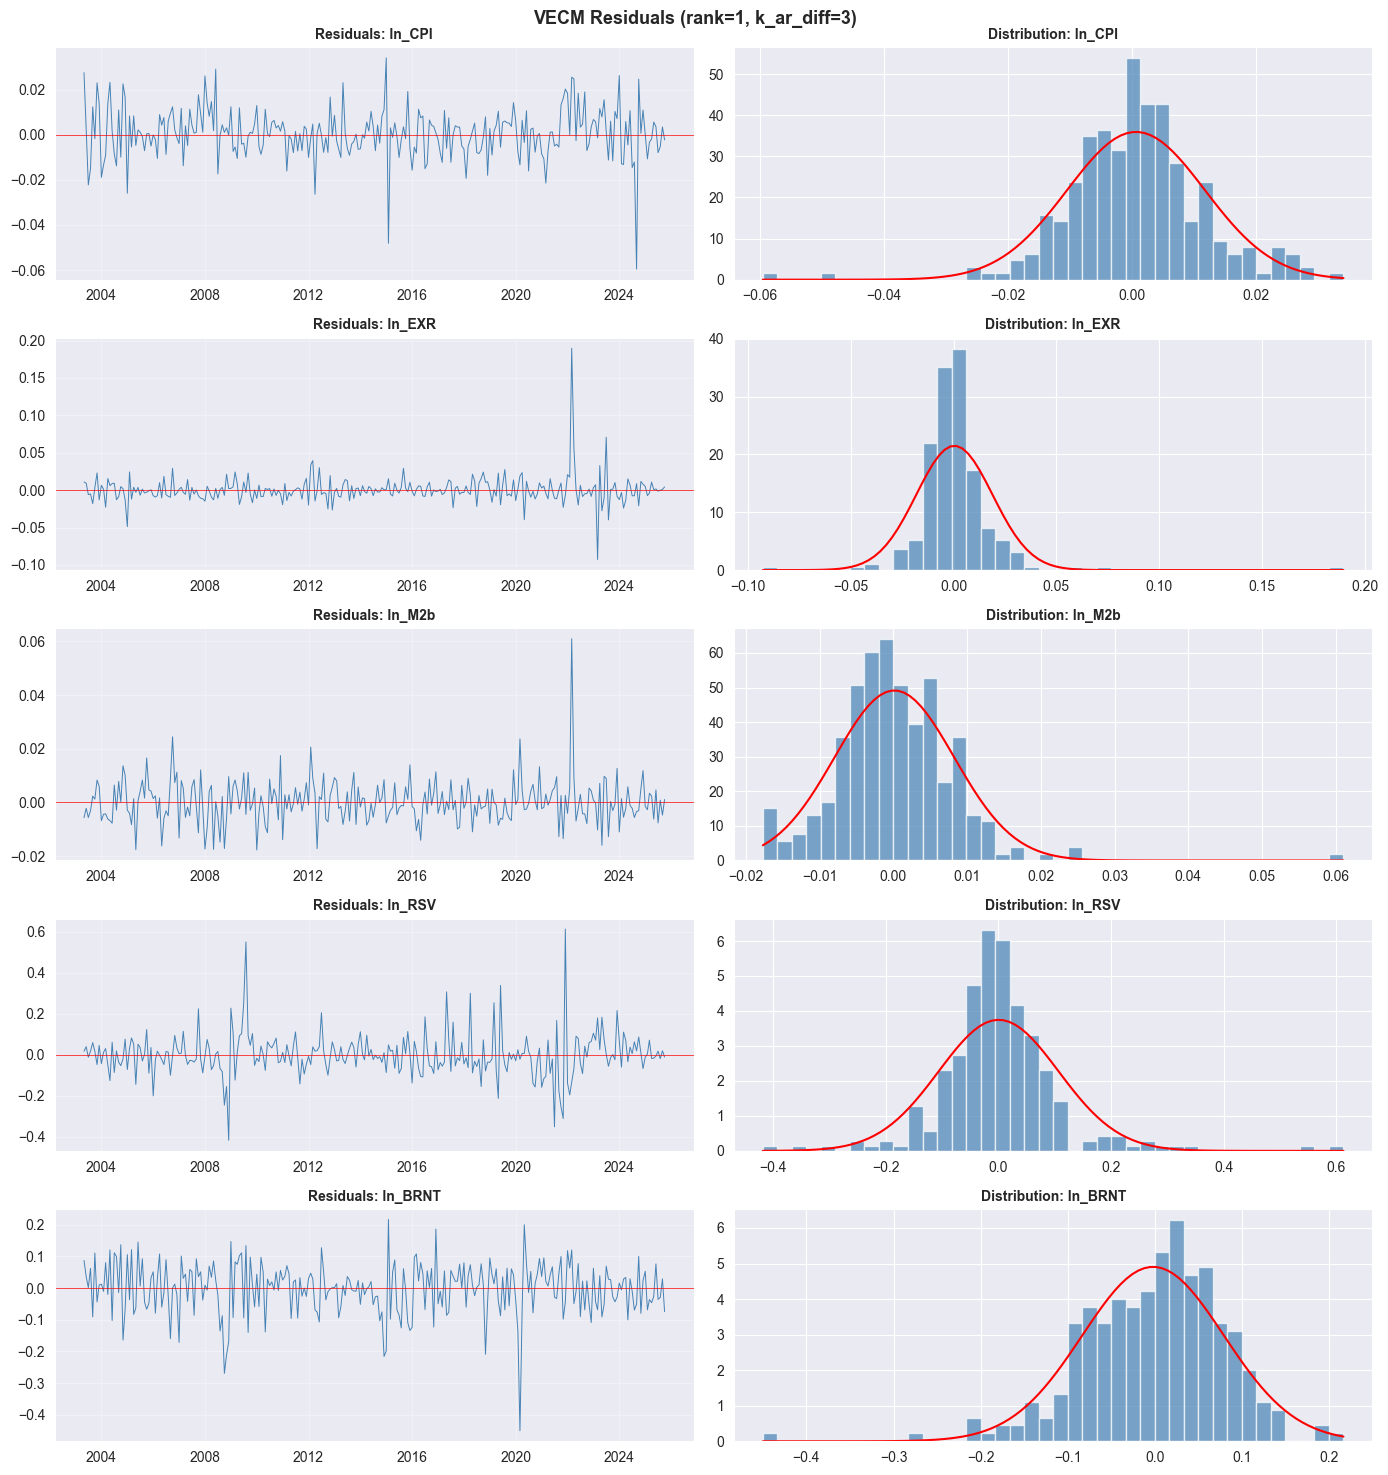

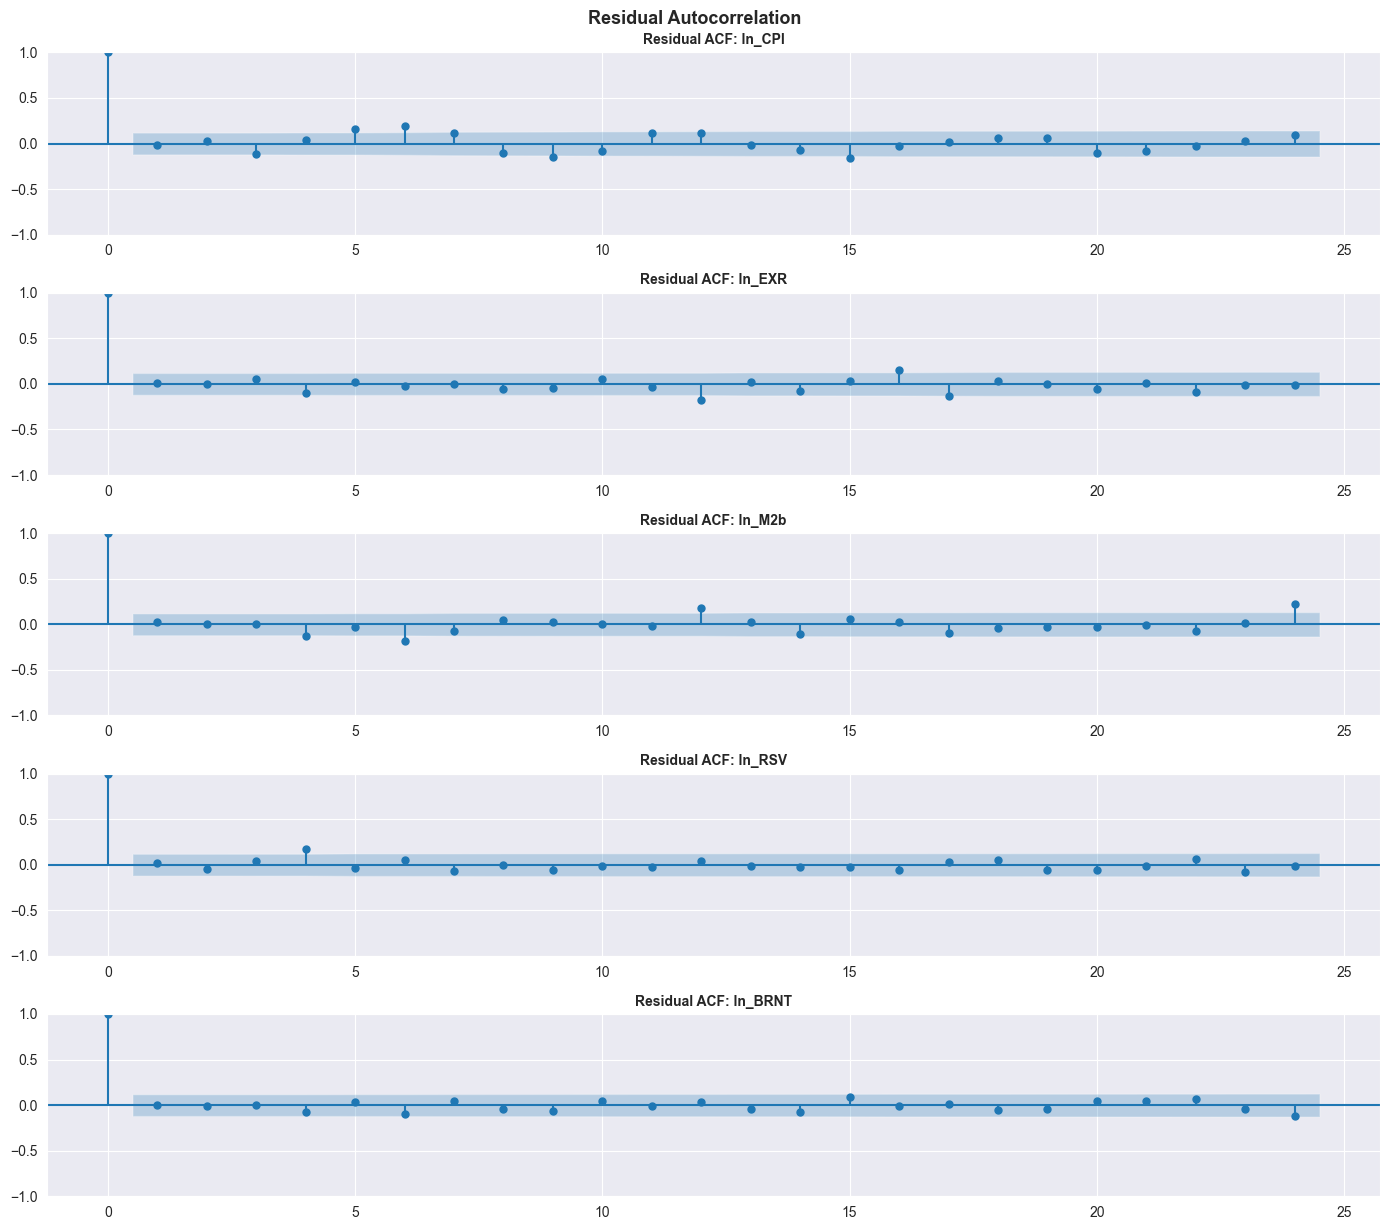


DIAGNOSTIC SUMMARY
  Model: VECM(rank=1, k_ar_diff=3)
  Variables: ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
  Obs: 270, Equations: 5

  Test                                    Result     Status
  ----------------------------------------------------------
  Serial Corr (Portmanteau h=12)        p=0.0022       FAIL
  Normality (Joint JB)                  p=0.0000       FAIL
  ARCH effects                          3/5 fail       FAIL
  Stability                           0 explosive      Pass 


In [7]:
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# VECM ESTIMATION
print("VECM ESTIMATION AND DIAGNOSTICS")
print("=" * 60)

coint_rank = 1  # Set from Johansen output
vecm_lag = 3

print(f"Rank: {coint_rank}, k_ar_diff: {vecm_lag}")
print(f"Variables: {coint_vars}")
print(f"Observations: {len(data_coint)}")

# Fit
vecm_model = VECM(data_coint, k_ar_diff=vecm_lag, coint_rank=coint_rank, deterministic='ci')
vecm_fit = vecm_model.fit()
print(vecm_fit.summary())

# Residuals
resid = vecm_fit.resid
n_obs, n_eq = resid.shape
resid_index = data_coint.index[vecm_lag + 1: vecm_lag + 1 + n_obs]

# Alpha and Beta
print("\n" + "=" * 60)
print("ERROR CORRECTION COEFFICIENTS (Alpha)")
print("=" * 60)

alpha = vecm_fit.alpha
alpha_df = pd.DataFrame(alpha, index=coint_vars,
                        columns=[f'EC{i+1}' for i in range(coint_rank)])
print(alpha_df.round(4))

if hasattr(vecm_fit, 'stderr_alpha') and vecm_fit.stderr_alpha is not None:
    t_alpha = alpha / vecm_fit.stderr_alpha
    print(f"\nAlpha t-statistics:")
    print(pd.DataFrame(t_alpha, index=coint_vars,
                        columns=[f'EC{i+1}' for i in range(coint_rank)]).round(3))
    print(f"\nSignificant at 5%:")
    print(pd.DataFrame(np.abs(t_alpha) > 1.96, index=coint_vars,
                        columns=[f'EC{i+1}' for i in range(coint_rank)]))

print(f"\nCointegrating Vector (beta, normalized on CPI):")
beta_est = vecm_fit.beta
beta_norm = beta_est / beta_est[0, :]
n_rows = beta_est.shape[0]
idx = coint_vars + ['const'] if n_rows > n_eq else coint_vars
print(pd.DataFrame(beta_norm, index=idx[:n_rows],
                    columns=[f'CV{i+1}' for i in range(coint_rank)]).round(4))

# DIAGNOSTIC 1: SERIAL CORRELATION
print("\n" + "=" * 60)
print("DIAGNOSTIC 1: SERIAL CORRELATION")
print("=" * 60)

# Ljung-Box per equation
print(f"\n  {'Variable':<12} {'LB(6) p':>10} {'LB(12) p':>10} {'LB(18) p':>10}")
print("  " + "-" * 45)

for j, var in enumerate(coint_vars):
    lb = acorr_ljungbox(resid[:, j], lags=[6, 12, 18], return_df=True)
    p6, p12, p18 = lb['lb_pvalue'].values
    flag = " *" if min(p6, p12, p18) < 0.05 else ""
    print(f"  {var:<12} {p6:>10.4f} {p12:>10.4f} {p18:>10.4f}{flag}")

# Multivariate Portmanteau
print("\nMultivariate Portmanteau Test:")
port_results = {}
C_0 = (resid.T @ resid) / n_obs
C_0_inv = np.linalg.inv(C_0)

for max_h in [6, 12, 18]:
    Q = 0
    for h in range(1, max_h + 1):
        C_h = (resid[h:].T @ resid[:-h]) / n_obs
        Q += np.trace(C_h.T @ C_0_inv @ C_h @ C_0_inv) / (n_obs - h)
    Q *= n_obs * n_obs
    df = n_eq**2 * (max_h - vecm_lag)
    p = 1 - stats.chi2.cdf(Q, df=max(df, 1))
    port_results[max_h] = p
    print(f"  h={max_h:>2}: Q={Q:>8.1f}, df={df:>3}, p={p:.4f} [{'Pass' if p > 0.05 else 'FAIL'}]")

# DIAGNOSTIC 2: NORMALITY
print("\n" + "=" * 60)
print("DIAGNOSTIC 2: NORMALITY")
print("=" * 60)

print(f"\n  {'Variable':<12} {'Skewness':>10} {'Kurtosis':>10} {'JB stat':>10} {'JB p':>10}")
print("  " + "-" * 55)

jb_total = 0
for j, var in enumerate(coint_vars):
    r = resid[:, j]
    sk = stats.skew(r)
    ku = stats.kurtosis(r, fisher=True)
    jb_s, jb_p = stats.jarque_bera(r)
    jb_total += jb_s
    flag = " *" if jb_p < 0.05 else ""
    print(f"  {var:<12} {sk:>10.3f} {ku:>10.3f} {jb_s:>10.2f} {jb_p:>10.4f}{flag}")

jb_joint_p = 1 - stats.chi2.cdf(jb_total, df=2 * n_eq)
print(f"\n  Joint: stat={jb_total:.2f}, df={2*n_eq}, p={jb_joint_p:.4f} "
      f"[{'Pass' if jb_joint_p > 0.05 else 'FAIL'}]")

# DIAGNOSTIC 3: HETEROSCEDASTICITY (ARCH-LM)
print("\n" + "=" * 60)
print("DIAGNOSTIC 3: HETEROSCEDASTICITY (ARCH-LM)")
print("=" * 60)

print(f"\n  {'Variable':<12} {'ARCH(1) p':>10} {'ARCH(4) p':>10} {'ARCH(12) p':>10}")
print("  " + "-" * 45)

arch_issues = []
for j, var in enumerate(coint_vars):
    r = resid[:, j]
    a1 = het_arch(r, nlags=1)
    a4 = het_arch(r, nlags=4)
    a12 = het_arch(r, nlags=12)
    flag = " *" if min(a1[1], a4[1], a12[1]) < 0.05 else ""
    if flag:
        arch_issues.append(var)
    print(f"  {var:<12} {a1[1]:>10.4f} {a4[1]:>10.4f} {a12[1]:>10.4f}{flag}")

# DIAGNOSTIC 4: STABILITY (Companion Matrix)
print("\n" + "=" * 60)
print("DIAGNOSTIC 4: STABILITY")
print("=" * 60)

# Reconstruct companion matrix from VECM → VAR(k) in levels
# VECM: Δyₜ = αβ'yₜ₋₁ + Γ₁Δyₜ₋₁ + ... + Γₚ₋₁Δyₜ₋ₚ₊₁ + uₜ
# VAR(k): yₜ = A₁yₜ₋₁ + ... + Aₖyₜ₋ₖ + uₜ  where k = vecm_lag + 1

beta_vars = vecm_fit.beta[:n_eq, :]
Pi = vecm_fit.alpha @ beta_vars.T
gamma = vecm_fit.gamma
k = vecm_lag + 1

A_list = []
if vecm_lag == 0:
    A_list.append(np.eye(n_eq) + Pi)
else:
    Gamma = [gamma[:, i*n_eq:(i+1)*n_eq] for i in range(vecm_lag)]
    A_list.append(np.eye(n_eq) + Pi + Gamma[0])
    for i in range(1, vecm_lag):
        A_list.append(Gamma[i] - Gamma[i-1])
    A_list.append(-Gamma[-1])

# Build companion matrix
comp_dim = n_eq * k
F = np.zeros((comp_dim, comp_dim))
for i, Ai in enumerate(A_list):
    F[:n_eq, i*n_eq:(i+1)*n_eq] = Ai
if k > 1:
    F[n_eq:, :-n_eq] = np.eye(n_eq * (k - 1))

eigenvalues = np.linalg.eigvals(F)
moduli = np.sort(np.abs(eigenvalues))[::-1]

print(f"\n  VAR order in levels: {k}")
print(f"  Companion dimension: {comp_dim}×{comp_dim}")
print(f"  Expected unit roots: {n_eq - coint_rank}")
print(f"\n  Top eigenvalue moduli:")
for i, m in enumerate(moduli[:min(12, len(moduli))]):
    marker = " unit root" if abs(m - 1.0) < 0.02 else (" UNSTABLE" if m > 1.02 else "")
    print(f"    {i+1:>3}: {m:.6f}{marker}")

n_unit = sum(abs(m - 1.0) < 0.02 for m in np.abs(eigenvalues))
n_outside = sum(m > 1.02 for m in np.abs(eigenvalues))
stable = n_outside == 0
print(f"\n  Unit roots found: {n_unit} (expected: {n_eq - coint_rank})")
print(f"  Explosive roots: {n_outside}")
print(f"  STABLE: {'Yes ' if stable else 'No'}")

# PLOTS

# Plot 1: Eigenvalues on unit circle
fig, ax = plt.subplots(figsize=(7, 7))
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=1)
ax.scatter(eigenvalues.real, eigenvalues.imag, c='steelblue', s=60,
           zorder=5, edgecolors='black', linewidth=0.5)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title(f'Companion Matrix Eigenvalues (rank={coint_rank})', fontweight='bold')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('vecm_stability.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 2: Residual time series + histograms
fig, axes = plt.subplots(n_eq, 2, figsize=(14, 3 * n_eq))
for j, var in enumerate(coint_vars):
    r = resid[:, j]
    axes[j, 0].plot(resid_index, r, linewidth=0.7, color='steelblue')
    axes[j, 0].axhline(0, color='red', linewidth=0.5)
    axes[j, 0].set_title(f'Residuals: {var}', fontweight='bold', fontsize=10)
    axes[j, 0].grid(True, alpha=0.3)

    axes[j, 1].hist(r, bins=40, density=True, alpha=0.7, color='steelblue', edgecolor='white')
    x = np.linspace(r.min(), r.max(), 100)
    axes[j, 1].plot(x, stats.norm.pdf(x, r.mean(), r.std()), 'r-', linewidth=1.5)
    axes[j, 1].set_title(f'Distribution: {var}', fontweight='bold', fontsize=10)

plt.suptitle(f'VECM Residuals (rank={coint_rank}, k_ar_diff={vecm_lag})',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('vecm_residuals.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 3: Residual ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(n_eq, 1, figsize=(14, 2.5 * n_eq))
for j, var in enumerate(coint_vars):
    plot_acf(resid[:, j], ax=axes[j], lags=24, alpha=0.05)
    axes[j].set_title(f'Residual ACF: {var}', fontweight='bold', fontsize=10)
plt.suptitle('Residual Autocorrelation', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('vecm_residual_acf.png', dpi=150, bbox_inches='tight')
plt.show()

# SUMMARY TABLE
print("\n" + "=" * 60)
print("DIAGNOSTIC SUMMARY")
print("=" * 60)
print(f"  Model: VECM(rank={coint_rank}, k_ar_diff={vecm_lag})")
print(f"  Variables: {coint_vars}")
print(f"  Obs: {n_obs}, Equations: {n_eq}")
print(f"")
print(f"  {'Test':<35} {'Result':>10} {'Status':>10}")
print("  " + "-" * 58)
print(f"  {'Serial Corr (Portmanteau h=12)':<35} {'p='+f'{port_results[12]:.4f}':>10} "
      f"{'Pass ' if port_results[12] > 0.05 else 'FAIL':>10}")
print(f"  {'Normality (Joint JB)':<35} {'p='+f'{jb_joint_p:.4f}':>10} "
      f"{'Pass ' if jb_joint_p > 0.05 else 'FAIL':>10}")
print(f"  {'ARCH effects':<35} {f'{len(arch_issues)}/{n_eq} fail':>10} "
      f"{'Pass ' if len(arch_issues) == 0 else 'FAIL':>10}")
print(f"  {'Stability':<35} {f'{n_outside} explosive':>10} "
      f"{'Pass ' if stable else 'FAIL':>10}")

In [8]:
print("TESTING LAG ORDERS FOR SERIAL CORRELATION")
print("=" * 60)

# 5-variable system (NCG excluded)
coint_vars = ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
data_coint = df_transformed[coint_vars].dropna()
n_eq = len(coint_vars)
coint_rank = 1

for test_lag in range(3, 9):
    print(f"\nk_ar_diff = {test_lag}:")
    try:
        fit = VECM(data_coint, k_ar_diff=test_lag, coint_rank=coint_rank,
                   deterministic='ci').fit()
        resid = fit.resid
        n_obs = resid.shape[0]

        # Individual LB(12)
        lb_pass = 0
        for j, var in enumerate(coint_vars):
            lb = acorr_ljungbox(resid[:, j], lags=[12], return_df=True)
            p = lb['lb_pvalue'].values[0]
            status = 'Pass' if p > 0.05 else 'FAIL'
            if p > 0.05:
                lb_pass += 1
            print(f"  {var:<12} LB(12) p={p:.4f}  {status}")

        # Multivariate Portmanteau h=12
        C_0 = (resid.T @ resid) / n_obs
        C_0_inv = np.linalg.inv(C_0)
        Q = 0
        for h in range(1, 13):
            C_h = (resid[h:].T @ resid[:-h]) / n_obs
            Q += np.trace(C_h.T @ C_0_inv @ C_h @ C_0_inv) / (n_obs - h)
        Q *= n_obs * n_obs
        df_q = n_eq**2 * (12 - test_lag)
        port_p = 1 - stats.chi2.cdf(Q, df=max(df_q, 1))

        print(f"  Individual: {lb_pass}/{n_eq} pass")
        print(f"  Portmanteau(12): p={port_p:.4f} [{'Pass' if port_p > 0.05 else 'FAIL'}]")

    except Exception as e:
        print(f"  Error: {e}")

TESTING LAG ORDERS FOR SERIAL CORRELATION

k_ar_diff = 3:
  ln_CPI       LB(12) p=0.0000  FAIL
  ln_EXR       LB(12) p=0.1934  Pass
  ln_M2b       LB(12) p=0.0124  FAIL
  ln_RSV       LB(12) p=0.2938  Pass
  ln_BRNT      LB(12) p=0.8251  Pass
  Individual: 3/5 pass
  Portmanteau(12): p=0.0022 [FAIL]

k_ar_diff = 4:
  ln_CPI       LB(12) p=0.0436  FAIL
  ln_EXR       LB(12) p=0.5889  Pass
  ln_M2b       LB(12) p=0.0528  Pass
  ln_RSV       LB(12) p=0.9330  Pass
  ln_BRNT      LB(12) p=0.9400  Pass
  Individual: 4/5 pass
  Portmanteau(12): p=0.0146 [FAIL]

k_ar_diff = 5:
  ln_CPI       LB(12) p=0.4803  Pass
  ln_EXR       LB(12) p=0.3152  Pass
  ln_M2b       LB(12) p=0.0813  Pass
  ln_RSV       LB(12) p=0.9621  Pass
  ln_BRNT      LB(12) p=0.9460  Pass
  Individual: 5/5 pass
  Portmanteau(12): p=0.0328 [FAIL]

k_ar_diff = 6:
  ln_CPI       LB(12) p=0.6398  Pass
  ln_EXR       LB(12) p=0.5108  Pass
  ln_M2b       LB(12) p=0.6781  Pass
  ln_RSV       LB(12) p=0.9815  Pass
  ln_BRNT      LB

STRUCTURAL BREAK & PARAMETER STABILITY TESTS

1. RECURSIVE STABILITY TEST
------------------------------------------------------------
  Break point: 137 observations
  Variance ratio (post/pre): 1.5845
  Chow F-test: F = 0.2808, p = 1.0000
  Result: STABLE

2. ROLLING WINDOW STABILITY (24-month windows)
------------------------------------------------------------

  EC coefficients stability (alpha):
  Equation              Mean    Std Dev     CV (%)
  --------------------------------------------------
  ln_CPI             -0.8542    30.0387     3516.6% *UNSTABLE
  ln_EXR              2.2928    53.7004     2342.2% *UNSTABLE
  ln_M2b             -1.1039    19.9476     1807.0% *UNSTABLE
  ln_RSV             43.1832   395.6400      916.2% *UNSTABLE
  ln_BRNT            24.8806   234.5868      942.8% *UNSTABLE

3. RESIDUAL VARIANCE STABILITY
------------------------------------------------------------


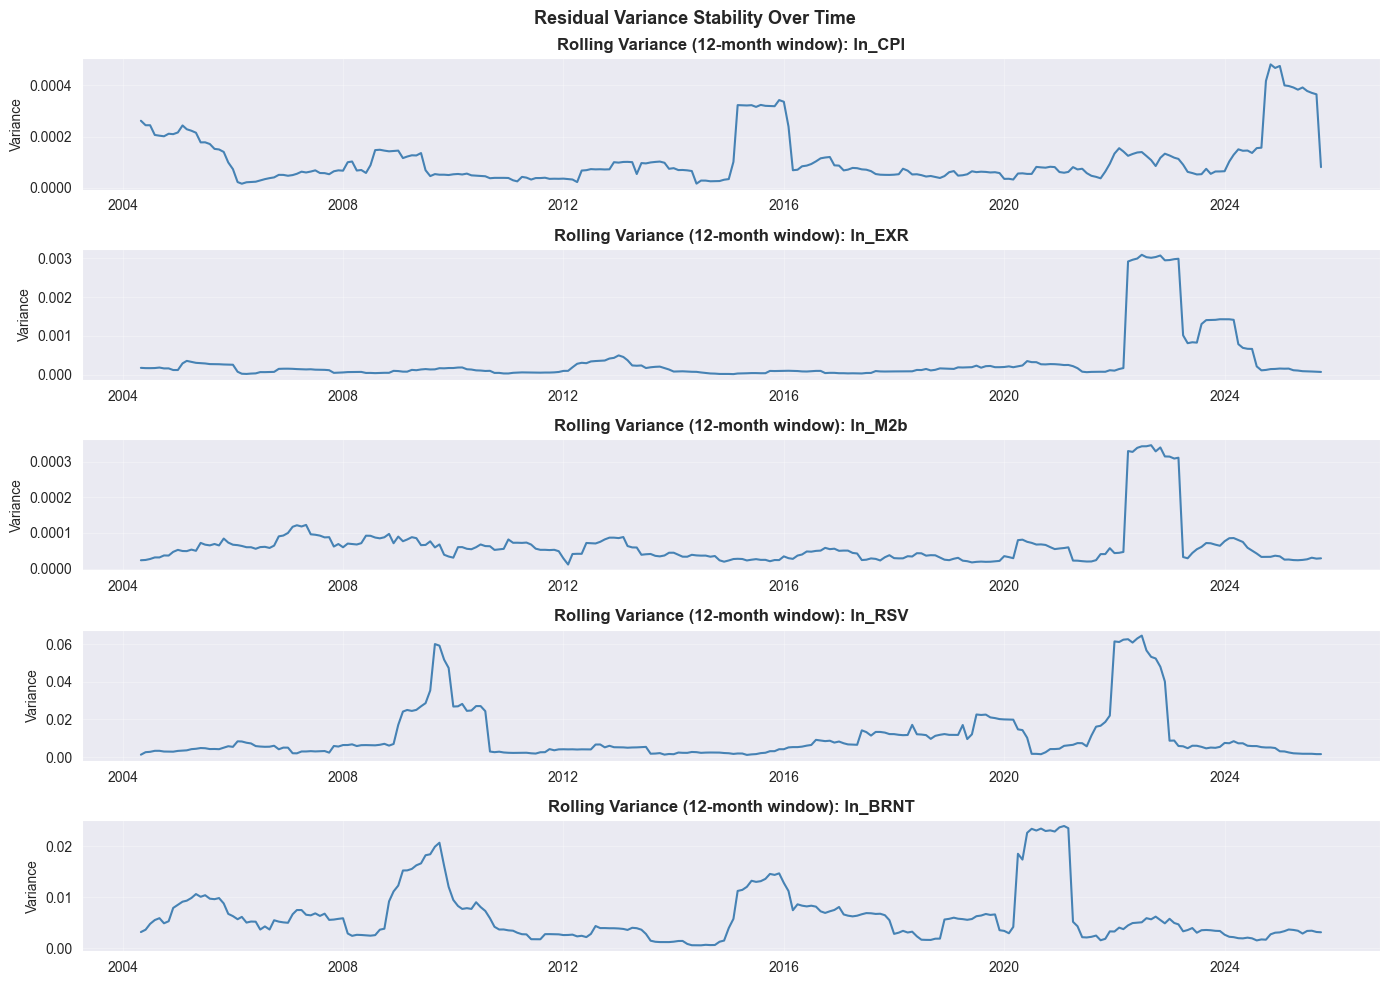


  Variance stability: Check plot for time-varying volatility
  Increasing variance suggests model instability in recent periods


In [9]:

# ============================================================
# BIAS REDUCTION: STRUCTURAL BREAK & STABILITY TESTING
# ============================================================
print("STRUCTURAL BREAK & PARAMETER STABILITY TESTS")
print("=" * 60)

from scipy import stats
import numpy as np

coint_vars = ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
data_coint = df_transformed[coint_vars].dropna()
n_obs = len(data_coint)
vecm_lag = 3
coint_rank = 1

# 1. RECURSIVE COEFFICIENT TEST (Chow-type stability)
print("\n1. RECURSIVE STABILITY TEST")
print("-" * 60)

def recursive_residuals_test(data, k_ar_diff, coint_rank, break_frac=0.5):
    """Compute recursive residuals and CUSUM statistic"""
    n = len(data)
    break_point = int(n * break_frac)
    
    # Fit on first half
    data_1 = data.iloc[:break_point]
    data_2 = data.iloc[break_point:]
    
    try:
        fit1 = VECM(data_1, k_ar_diff=k_ar_diff, coint_rank=coint_rank, 
                    deterministic='ci').fit()
        fit2 = VECM(data_2, k_ar_diff=k_ar_diff, coint_rank=coint_rank, 
                    deterministic='ci').fit()
        
        # Compare residual variance
        var1 = np.sum(fit1.resid ** 2) / len(fit1.resid)
        var2 = np.sum(fit2.resid ** 2) / len(fit2.resid)
        
        # Chow test: F-statistic on residual sum of squares
        rss1 = np.sum(fit1.resid ** 2)
        rss2 = np.sum(fit2.resid ** 2)
        rss_full = rss1 + rss2
        
        fit_full = VECM(data, k_ar_diff=k_ar_diff, coint_rank=coint_rank,
                        deterministic='ci').fit()
        rss_full_model = np.sum(fit_full.resid ** 2)
        
        n_eq = data.shape[1]
        k_params = n_eq * (k_ar_diff * n_eq + 1)  # approximate
        
        f_stat = ((rss_full_model - (rss1 + rss2)) / k_params) / ((rss1 + rss2) / (n - 2*k_params))
        p_val = 1 - stats.f.cdf(f_stat, k_params, max(n - 2*k_params, 1))
        
        return {
            'break_point': break_point,
            'var_ratio': var2 / var1,
            'f_stat': f_stat,
            'p_value': p_val,
            'stability': 'STABLE' if p_val > 0.05 else 'UNSTABLE'
        }
    except:
        return None

chow_result = recursive_residuals_test(data_coint, vecm_lag, coint_rank, 0.5)
if chow_result:
    print(f"  Break point: {chow_result['break_point']} observations")
    print(f"  Variance ratio (post/pre): {chow_result['var_ratio']:.4f}")
    print(f"  Chow F-test: F = {chow_result['f_stat']:.4f}, p = {chow_result['p_value']:.4f}")
    print(f"  Result: {chow_result['stability']}")
else:
    print("  Could not compute Chow test")

# 2. ROLLING WINDOW PARAMETER STABILITY
print("\n2. ROLLING WINDOW STABILITY (24-month windows)")
print("-" * 60)

window_size = 24
n_rolling = n_obs - window_size - vecm_lag
alpha_rolling = []
dates_rolling = []

for t in range(vecm_lag + 1, n_obs - window_size):
    data_window = data_coint.iloc[t:t+window_size]
    try:
        fit_window = VECM(data_window, k_ar_diff=vecm_lag, coint_rank=coint_rank,
                          deterministic='ci').fit()
        alpha_rolling.append(fit_window.alpha.flatten())
        dates_rolling.append(data_coint.index[t+window_size-1])
    except:
        pass

if alpha_rolling:
    alpha_rolling = np.array(alpha_rolling)
    alpha_std = np.std(alpha_rolling, axis=0)
    alpha_mean = np.mean(alpha_rolling, axis=0)
    
    print(f"\n  EC coefficients stability (alpha):")
    print(f"  {'Equation':<15} {'Mean':>10} {'Std Dev':>10} {'CV (%)':>10}")
    print("  " + "-" * 50)
    for i, var in enumerate(coint_vars):
        cv = (alpha_std[i] / (np.abs(alpha_mean[i]) + 1e-8)) * 100
        flag = " *UNSTABLE" if cv > 30 else ""
        print(f"  {var:<15} {alpha_mean[i]:>10.4f} {alpha_std[i]:>10.4f} {cv:>10.1f}%{flag}")

# 3. RESIDUAL STABILITY OVER TIME
print("\n3. RESIDUAL VARIANCE STABILITY")
print("-" * 60)

fit_full = VECM(data_coint, k_ar_diff=vecm_lag, coint_rank=coint_rank,
                deterministic='ci').fit()

resid = fit_full.resid
n_resid = len(resid)

resid_var = np.zeros((n_resid, len(coint_vars)))

window = 12
for t in range(window, n_resid):
    for j in range(len(coint_vars)):
        resid_var[t, j] = np.var(resid[t-window:t, j])

# The residuals correspond to the LAST n_resid observations of data_coint
# VECM loses (k_ar_diff + 1) observations from the start
resid_dates = data_coint.index[len(data_coint) - n_resid:]

fig, axes = plt.subplots(len(coint_vars), 1, figsize=(14, 10))
if len(coint_vars) == 1:
    axes = [axes]

for j, var in enumerate(coint_vars):
    # Both sliced from 'window' onward so they match in length
    plot_dates = resid_dates[window:]
    plot_values = resid_var[window:, j]

    axes[j].plot(plot_dates, plot_values, color='steelblue', linewidth=1.5)
    axes[j].set_title(f'Rolling Variance (12-month window): {var}', fontweight='bold')
    axes[j].grid(True, alpha=0.3)
    axes[j].set_ylabel('Variance')

plt.suptitle('Residual Variance Stability Over Time', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('stability_residual_variance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n  Variance stability: Check plot for time-varying volatility")
print("  Increasing variance suggests model instability in recent periods")

In [10]:
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 5-variable system (NCG excluded)
endog_vars = ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_BRNT', 'ln_RSV']
data_vecm = df_transformed[endog_vars].dropna()
coint_rank = 1
k_ar_diff = 6
n_eq = len(endog_vars)

# --- ESTIMATION ---
print("=" * 60)
print(f"VECM ESTIMATION (k_ar_diff={k_ar_diff}, coint_rank={coint_rank})")
print(f"Variables: {endog_vars}")
print(f"Observations: {len(data_vecm)}")
print("=" * 60)

vecm_result = VECM(endog=data_vecm, k_ar_diff=k_ar_diff,
                    coint_rank=coint_rank, deterministic='ci').fit()
print(vecm_result.summary())

# --- COINTEGRATING VECTOR ---
print("\n" + "=" * 60)
print("COINTEGRATING RELATIONSHIP")
print("=" * 60)

beta = vecm_result.beta
n_beta_rows = beta.shape[0]
idx_beta = endog_vars + ['const'] if n_beta_rows > n_eq else endog_vars

print("\nRaw Beta:")
print(pd.DataFrame(beta, index=idx_beta[:n_beta_rows], columns=['CE1']).round(4))

# Normalize on ln_CPI
cpi_pos = endog_vars.index('ln_CPI')
beta_norm = beta / beta[cpi_pos, 0]
print("\nCE1 (normalized on ln_CPI):")
print("  ln_CPI = ", end="")
terms = []
for j, var in enumerate(endog_vars):
    if var == 'ln_CPI':
        continue
    terms.append(f"{-beta_norm[j, 0]:+.4f}*{var}")
if n_beta_rows > n_eq:
    terms.append(f"{-beta_norm[-1, 0]:+.4f}")
print(" ".join(terms))

# --- ADJUSTMENT COEFFICIENTS ---
print("\n" + "=" * 60)
print("ADJUSTMENT COEFFICIENTS (Alpha)")
print("=" * 60)

alpha = vecm_result.alpha
print(pd.DataFrame(alpha, index=endog_vars, columns=['CE1']).round(4))

for j, var in enumerate(endog_vars):
    a = alpha[j, 0]
    if abs(a) > 0.01:
        role = "Adjusts toward equilibrium" if a < 0 else "Moves away from equilibrium"
    else:
        role = "Weakly exogenous"
    print(f"  {var:<12} alpha={a:+.4f}  → {role}")

# --- DIAGNOSTICS ---
print("\n" + "=" * 60)
print("DIAGNOSTIC TESTS")
print("=" * 60)

residuals = vecm_result.resid

# 1. Serial Correlation
print("\n1. Serial Correlation (Ljung-Box):")
for i, var in enumerate(endog_vars):
    lb = acorr_ljungbox(residuals[:, i], lags=[10, 20], return_df=True)
    p10 = lb.iloc[0]['lb_pvalue']
    p20 = lb.iloc[1]['lb_pvalue']
    status = 'PASS' if p10 > 0.05 and p20 > 0.05 else 'FAIL'
    print(f"  {var:<12} LB(10) p={p10:.4f}  LB(20) p={p20:.4f}  {status}")

# 2. Normality
print("\n2. Normality (Jarque-Bera):")
for i, var in enumerate(endog_vars):
    jb_stat, jb_p, skew, kurt = jarque_bera(residuals[:, i])
    status = 'PASS' if jb_p > 0.05 else 'FAIL'
    print(f"  {var:<12} JB={jb_stat:>10.2f}  p={jb_p:.4f}  skew={skew:.3f}  "
          f"kurt={kurt:.3f}  {status}")

# 3. ARCH-LM
print("\n3. Heteroscedasticity (ARCH-LM):")
for i, var in enumerate(endog_vars):
    resid_sq = residuals[:, i] ** 2
    n = len(resid_sq)
    lags = 5
    y = resid_sq[lags:]
    X = np.column_stack([np.ones(len(y))] +
                        [resid_sq[lags-j-1:n-j-1] for j in range(lags)])
    beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
    r_sq = 1 - np.sum((y - X @ beta_hat)**2) / np.sum((y - np.mean(y))**2)
    lm_stat = n * r_sq
    lm_p = 1 - stats.chi2.cdf(lm_stat, lags)
    status = 'PASS' if lm_p > 0.05 else 'FAIL'
    print(f"  {var:<12} LM={lm_stat:>8.4f}  p={lm_p:.4f}  {status}")

# 4. Stability
Pi = vecm_result.alpha @ vecm_result.beta[:n_eq, :].T
pi_rank = np.linalg.matrix_rank(Pi, tol=0.01)
print(f"\n4. Stability: Pi rank = {pi_rank} (should = {coint_rank}): "
      f"{'PASS' if pi_rank == coint_rank else 'FAIL'}")

print(f"\nLog-Likelihood: {vecm_result.llf:.4f}")
print(f"Observations: {len(residuals)}")

VECM ESTIMATION (k_ar_diff=6, coint_rank=1)
Variables: ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_BRNT', 'ln_RSV']
Observations: 274
Det. terms outside the coint. relation & lagged endog. parameters for equation ln_CPI
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.ln_CPI      0.4318      0.061      7.072      0.000       0.312       0.551
L1.ln_EXR      0.1831      0.041      4.478      0.000       0.103       0.263
L1.ln_M2b      0.0784      0.090      0.866      0.387      -0.099       0.256
L1.ln_BRNT     0.0240      0.008      3.035      0.002       0.009       0.040
L1.ln_RSV      0.0013      0.006      0.211      0.833      -0.011       0.013
L2.ln_CPI     -0.0459      0.065     -0.701      0.483      -0.174       0.082
L2.ln_EXR     -0.0379      0.046     -0.831      0.406      -0.127       0.051
L2.ln_M2b      0.1688      0.091      1.856      0.064      -0.009       0.347


IMPULSE RESPONSE FUNCTIONS (Generalized, 36-month)
Note: Ordering-independent (Pesaran & Shin 1998)

Channel                              1M       3M       6M      12M      24M      36M     Peak   At
-----------------------------------------------------------------------------------------------
M2b -> CPI                       0.0028   0.0095   0.0113   0.0137   0.0151   0.0146   0.0151   22
EXR -> CPI                       0.0065   0.0141   0.0178   0.0186   0.0192   0.0192   0.0193   29
M2b -> EXR                       0.0161   0.0173   0.0124   0.0159   0.0169   0.0167   0.0177    2
RSV -> EXR                      -0.0079  -0.0088  -0.0165  -0.0194  -0.0198  -0.0187  -0.0205   10
BRNT -> CPI                      0.0020   0.0059   0.0085   0.0107   0.0110   0.0099   0.0114   17
BRNT -> EXR                      0.0004   0.0045   0.0050   0.0053   0.0064   0.0057   0.0070   16

Timing: When does 50% of 12-month response accumulate?
Channel                          50% at  Direction
--

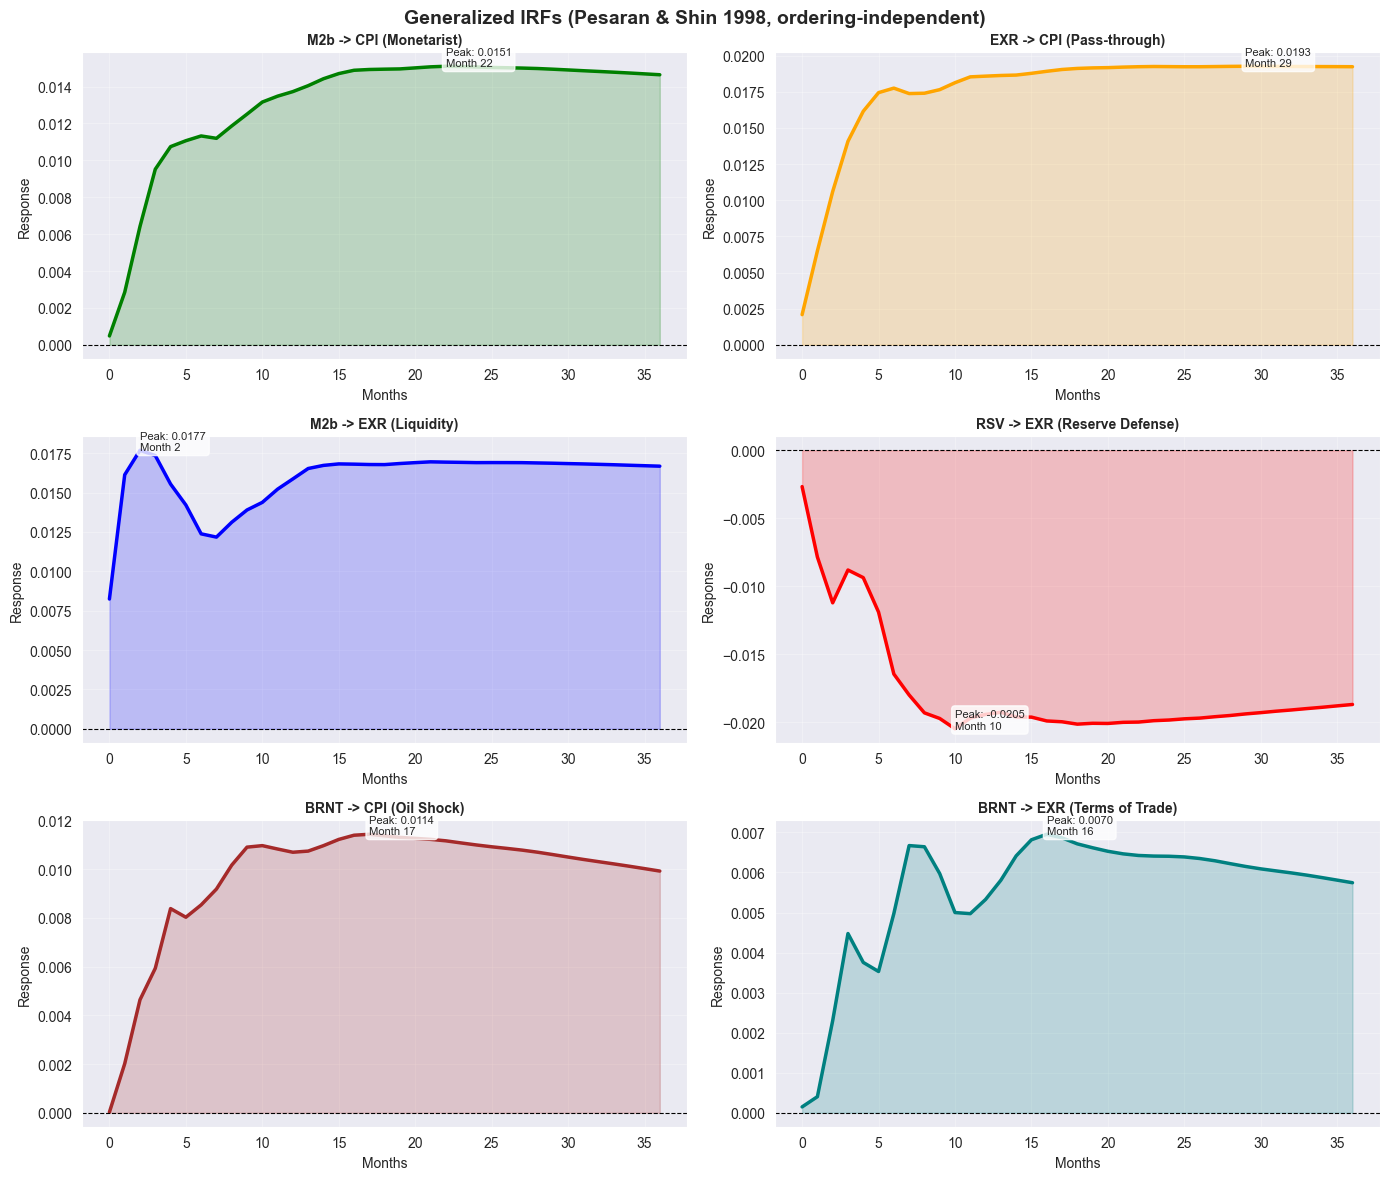


FORECAST ERROR VARIANCE DECOMPOSITION (Generalized)

Variance Decomposition of ln_CPI:
 Horizon      ln_CPI      ln_EXR      ln_M2b     ln_BRNT      ln_RSV
--------------------------------------------------------------------
     1m        85.0%       11.8%        2.1%        1.0%        0.1%
     3m        62.4%       23.5%        9.2%        4.0%        0.9%
     6m        53.1%       28.2%       11.5%        6.1%        1.1%
    12m        53.8%       24.6%       11.4%        7.2%        3.0%
    24m        54.8%       22.1%       12.1%        7.1%        3.8%
    36m        56.6%       21.3%       12.0%        6.6%        3.5%

Variance Decomposition of ln_EXR:
 Horizon      ln_CPI      ln_EXR      ln_M2b     ln_BRNT      ln_RSV
--------------------------------------------------------------------
     1m         3.3%       72.2%       20.3%        0.0%        4.3%
     3m         5.1%       71.2%       18.0%        0.5%        5.2%
     6m        10.1%       67.5%       14.4%     

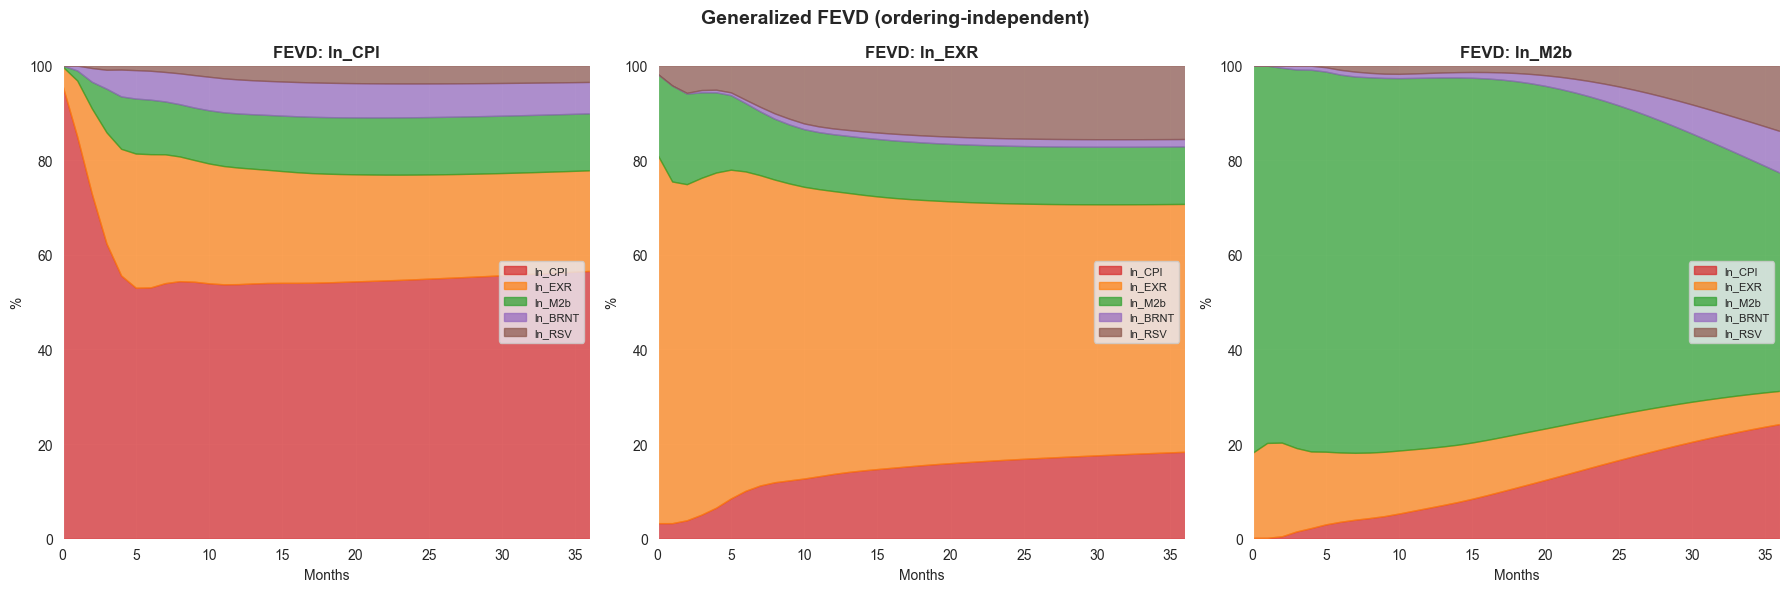

In [11]:
# ============================================================
# GENERALIZED IRFs (Pesaran & Shin 1998 — ordering-independent)
# ============================================================
print(f"\n{'=' * 60}")
print("IMPULSE RESPONSE FUNCTIONS (Generalized, 36-month)")
print("Note: Ordering-independent (Pesaran & Shin 1998)")
print(f"{'=' * 60}")

periods = 36
irf = vecm_result.irf(periods=periods)
ma_coefs = irf.irfs  # non-orthogonalized MA coefficients
sigma = np.cov(residuals.T)

# Compute GIRF
girf = np.zeros((periods + 1, n_eq, n_eq))
for h in range(periods + 1):
    for j in range(n_eq):
        sigma_jj = sigma[j, j]
        girf[h, :, j] = ma_coefs[h] @ sigma[:, j] / np.sqrt(sigma_jj)

var_to_idx = {v: i for i, v in enumerate(endog_vars)}

# 6 channels (NCG channels removed)
key_channels = [
    ('ln_M2b',  'ln_CPI',  'M2b -> CPI (Monetarist)'),
    ('ln_EXR',  'ln_CPI',  'EXR -> CPI (Pass-through)'),
    ('ln_M2b',  'ln_EXR',  'M2b -> EXR (Liquidity)'),
    ('ln_RSV',  'ln_EXR',  'RSV -> EXR (Reserve Defense)'),
    ('ln_BRNT', 'ln_CPI',  'BRNT -> CPI (Oil Shock)'),
    ('ln_BRNT', 'ln_EXR',  'BRNT -> EXR (Terms of Trade)')
]

print(f"\n{'Channel':<30} {'1M':>8} {'3M':>8} {'6M':>8} {'12M':>8} "
      f"{'24M':>8} {'36M':>8} {'Peak':>8} {'At':>4}")
print("-" * 95)

for imp, resp, title in key_channels:
    r = girf[:, var_to_idx[resp], var_to_idx[imp]]
    pk = np.argmax(np.abs(r))
    label = title.split('(')[0].strip()
    print(f"{label:<30} {r[1]:>8.4f} {r[3]:>8.4f} {r[6]:>8.4f} "
          f"{r[12]:>8.4f} {r[24]:>8.4f} {r[min(36,len(r)-1)]:>8.4f} "
          f"{r[pk]:>8.4f} {pk:>4}")

# Timing analysis
print(f"\nTiming: When does 50% of 12-month response accumulate?")
print(f"{'Channel':<30} {'50% at':>8} {'Direction':>10}")
print("-" * 50)
for imp, resp, title in key_channels:
    r = girf[:, var_to_idx[resp], var_to_idx[imp]]
    r12 = r[12]
    if abs(r12) > 1e-6:
        t50 = next((t for t in range(13) if abs(r[t]) >= 0.5 * abs(r12)), 12)
        sign = 'Positive' if r12 > 0 else 'Negative'
        label = title.split('(')[0].strip()
        print(f"{label:<30} {t50:>6}m   {sign:>10}")

# IRF plots (3x2 layout for 6 channels)
colors_irf = ['green', 'orange', 'blue', 'red', 'brown', 'teal']
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (imp, resp, title) in enumerate(key_channels):
    ax = axes[idx]
    r = girf[:, var_to_idx[resp], var_to_idx[imp]]
    t = np.arange(len(r))
    ax.plot(t, r, linewidth=2.5, color=colors_irf[idx])
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.fill_between(t, 0, r, alpha=0.2, color=colors_irf[idx])
    ax.set_title(title, fontweight='bold', fontsize=10)
    ax.set_xlabel('Months')
    ax.set_ylabel('Response')
    ax.grid(True, alpha=0.3)
    pk = np.argmax(np.abs(r))
    ax.annotate(f'Peak: {r[pk]:.4f}\nMonth {pk}', xy=(pk, r[pk]), fontsize=8,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Generalized IRFs (Pesaran & Shin 1998, ordering-independent)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('girf_final.png', dpi=200, bbox_inches='tight')
plt.show()

# ============================================================
# FEVD (from generalized IRFs)
# ============================================================
print(f"\n{'=' * 60}")
print("FORECAST ERROR VARIANCE DECOMPOSITION (Generalized)")
print(f"{'=' * 60}")

fevd_array = np.zeros((periods + 1, n_eq, n_eq))
for h in range(periods + 1):
    for j in range(n_eq):
        for k in range(n_eq):
            fevd_array[h, j, k] = np.sum(girf[:h+1, j, k] ** 2)
    row_sums = fevd_array[h].sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1
    fevd_array[h] /= row_sums

for target in ['ln_CPI', 'ln_EXR', 'ln_M2b']:
    target_idx = endog_vars.index(target)
    print(f"\nVariance Decomposition of {target}:")
    print(f"{'Horizon':>8}" + ''.join(f"{v:>12}" for v in endog_vars))
    print("-" * (8 + 12 * n_eq))
    for h in [1, 3, 6, 12, 24, 36]:
        print(f"{h:>6}m " + ''.join(
            f"{fevd_array[h, target_idx, j]*100:>11.1f}%" for j in range(n_eq)))

# 5 colors for 5 variables
colors_fevd = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, target in enumerate(['ln_CPI', 'ln_EXR', 'ln_M2b']):
    ax = axes[idx]
    ti = endog_vars.index(target)
    bottom = np.zeros(periods + 1)
    for j, var in enumerate(endog_vars):
        vals = fevd_array[:, ti, j] * 100
        ax.fill_between(range(periods + 1), bottom, bottom + vals,
                        label=var, color=colors_fevd[j], alpha=0.7)
        bottom += vals
    ax.set_title(f'FEVD: {target}', fontweight='bold')
    ax.set_xlabel('Months')
    ax.set_ylabel('%')
    ax.set_xlim(0, periods)
    ax.set_ylim(0, 100)
    ax.legend(loc='center right', fontsize=8)
    ax.grid(True, alpha=0.3)
plt.suptitle('Generalized FEVD (ordering-independent)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('gfevd_final.png', dpi=200, bbox_inches='tight')
plt.show()

B1: DATA PREPARATION & TRAIN-TEST SPLIT
Train: 2003-01 to 2022-12 (240 obs)
Test:  2023-01 to 2025-10 (34 obs)

MODEL 1: NAIVE (Random Walk)
  ln_CPI: RMSE=0.014710, MAE=0.008789
  ln_EXR: RMSE=0.023312, MAE=0.013748

MODEL 2: ARIMA

  Fitting ln_CPI...
  Selected: ARIMA(2, 1, 0)
    10/34 done...
    20/34 done...
    30/34 done...
  ln_CPI: RMSE=0.015451, MAE=0.010339

  Fitting ln_EXR...
  Selected: ARIMA(2, 1, 0)
    10/34 done...
    20/34 done...
    30/34 done...
  ln_EXR: RMSE=0.026558, MAE=0.016060

MODEL 3: VECM (Expanding Window)
  10/34 done...
  20/34 done...
  30/34 done...
  ln_CPI: RMSE=0.014233, MAE=0.009693
  ln_EXR: RMSE=0.025726, MAE=0.016190

MODEL 4: LSTM

  Training LSTM for ln_CPI...
  Best val_loss: 0.015886, Epochs: 16
  ln_CPI: RMSE=0.023266, MAE=0.018620

  Training LSTM for ln_EXR...
  Best val_loss: 0.015047, Epochs: 17
  ln_EXR: RMSE=0.026473, MAE=0.016422

MODEL 5: HYBRID VECM-LSTM (Adaptive Weights)

  ln_CPI — Adaptive weight summary:
    Burn-in (equa

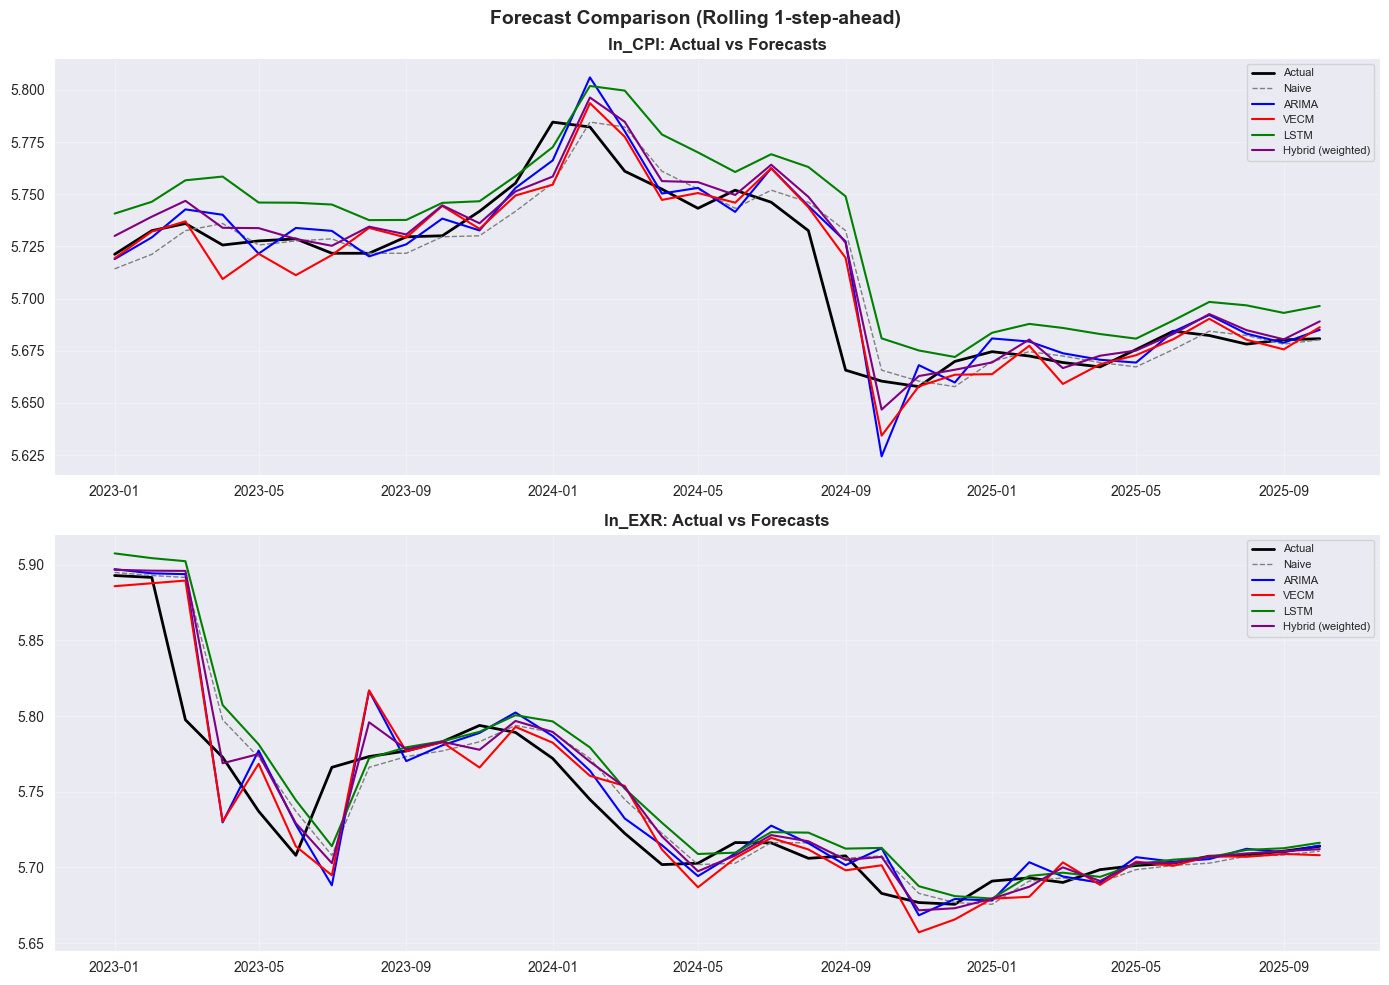

In [39]:
# ============================================================
# PHASE B: FORECASTING FRAMEWORK
# Aligned with VECM: 5 endog (NCG excluded), rank=1, lag=6, no exog
# ============================================================

from statsmodels.tsa.vector_ar.vecm import VECM
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# --- B1: DATA PREPARATION & SPLIT ---
print("=" * 60)
print("B1: DATA PREPARATION & TRAIN-TEST SPLIT")
print("=" * 60)

# 5-variable system (NCG excluded)
endog_vars = ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_BRNT', 'ln_RSV']
target_vars = ['ln_CPI', 'ln_EXR']
split_date = '2022-12-01'

data_full = df_transformed[endog_vars].dropna()
train = data_full.loc[:split_date]
test = data_full.loc[split_date:].iloc[1:]
n_train, n_test = len(train), len(test)

print(f"Train: {train.index[0].strftime('%Y-%m')} to {train.index[-1].strftime('%Y-%m')} ({n_train} obs)")
print(f"Test:  {test.index[0].strftime('%Y-%m')} to {test.index[-1].strftime('%Y-%m')} ({n_test} obs)")

forecasts = {}
actuals = {var: test[var].values for var in target_vars}

# --- B2: NAIVE (Rolling Random Walk) ---
print(f"\n{'=' * 60}")
print("MODEL 1: NAIVE (Random Walk)")
print(f"{'=' * 60}")

for var in target_vars:
    naive = np.zeros(n_test)
    naive[0] = train[var].iloc[-1]
    for t in range(1, n_test):
        naive[t] = test[var].iloc[t - 1]
    forecasts[f'{var}_naive'] = naive
    rmse = np.sqrt(mean_squared_error(actuals[var], naive))
    mae = mean_absolute_error(actuals[var], naive)
    print(f"  {var}: RMSE={rmse:.6f}, MAE={mae:.6f}")

# --- B3: ARIMA (Rolling 1-step, re-fit each step) ---
print(f"\n{'=' * 60}")
print("MODEL 2: ARIMA")
print(f"{'=' * 60}")

for var in target_vars:
    print(f"\n  Fitting {var}...")
    # Select order on training data
    auto_fit = auto_arima(train[var], start_p=0, start_q=0,
                          max_p=5, max_q=5, d=1,
                          seasonal=False, stepwise=True,
                          suppress_warnings=True, information_criterion='aic')
    best_order = auto_fit.order
    print(f"  Selected: ARIMA{best_order}")

    # Rolling 1-step with fixed order, expanding window
    arima_fc = np.zeros(n_test)
    for t in range(n_test):
        history = pd.concat([train[var], test[var].iloc[:t]])
        model = auto_arima(history, order=best_order,
                           seasonal=False, suppress_warnings=True)
        arima_fc[t] = model.predict(n_periods=1)[0]
        if (t + 1) % 10 == 0:
            print(f"    {t + 1}/{n_test} done...")

    forecasts[f'{var}_arima'] = arima_fc
    rmse = np.sqrt(mean_squared_error(actuals[var], arima_fc))
    mae = mean_absolute_error(actuals[var], arima_fc)
    print(f"  {var}: RMSE={rmse:.6f}, MAE={mae:.6f}")

# --- B4: VECM (Expanding Window, Rolling 1-step) ---
print(f"\n{'=' * 60}")
print("MODEL 3: VECM (Expanding Window)")
print(f"{'=' * 60}")

coint_rank = 1
k_ar_diff = 6

vecm_all_preds = np.zeros((n_test, len(endog_vars)))

for t in range(n_test):
    if t == 0:
        window = train.copy()
    else:
        window = pd.concat([train, test.iloc[:t]])

    try:
        vecm_t = VECM(window, k_ar_diff=k_ar_diff, coint_rank=coint_rank,
                       deterministic='ci').fit()
        pred = vecm_t.predict(steps=1)
        vecm_all_preds[t] = pred[0]
    except:
        vecm_all_preds[t] = window.values[-1]

    if (t + 1) % 10 == 0:
        print(f"  {t + 1}/{n_test} done...")

for var in target_vars:
    idx = endog_vars.index(var)
    forecasts[f'{var}_vecm'] = vecm_all_preds[:, idx]
    rmse = np.sqrt(mean_squared_error(actuals[var], vecm_all_preds[:, idx]))
    mae = mean_absolute_error(actuals[var], vecm_all_preds[:, idx])
    print(f"  {var}: RMSE={rmse:.6f}, MAE={mae:.6f}")

# --- B5: LSTM ---
print(f"\n{'=' * 60}")
print("MODEL 4: LSTM")
print(f"{'=' * 60}")

# 5 diff variables (NCG excluded)
diff_vars = ['d_ln_CPI', 'd_ln_EXR', 'd_ln_M2b', 'd_ln_BRNT', 'd_ln_RSV']
lstm_data = df_transformed[diff_vars].dropna()
lstm_train = lstm_data.loc[:split_date]
lstm_test = lstm_data.loc[split_date:].iloc[1:]

lookback = 12

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(lstm_train)
test_scaled = scaler.transform(lstm_test)
buffer = train_scaled[-lookback:]
all_test_scaled = np.vstack([buffer, test_scaled])

def create_sequences(data, lookback, target_idx):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i, target_idx])
    return np.array(X), np.array(y)

def build_lstm(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='huber')
    return model

callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)
]

# diff_vars order: d_ln_CPI=0, d_ln_EXR=1
target_diff_idx = {'ln_CPI': 0, 'ln_EXR': 1}

for var in target_vars:
    tidx = target_diff_idx[var]
    print(f"\n  Training LSTM for {var}...")

    X_tr, y_tr = create_sequences(train_scaled, lookback, tidx)
    X_te, y_te = create_sequences(all_test_scaled, lookback, tidx)

    val_split = int(len(X_tr) * 0.8)
    X_val, y_val = X_tr[val_split:], y_tr[val_split:]
    X_tr_f, y_tr_f = X_tr[:val_split], y_tr[:val_split]

    model = build_lstm(input_shape=(lookback, len(diff_vars)))
    history = model.fit(X_tr_f, y_tr_f, validation_data=(X_val, y_val),
                        epochs=200, batch_size=16, callbacks=callbacks, verbose=0)
    print(f"  Best val_loss: {min(history.history['val_loss']):.6f}, "
          f"Epochs: {len(history.history['loss'])}")

    # Predict and inverse transform
    pred_scaled = model.predict(X_te, verbose=0).flatten()
    dummy = np.zeros((len(pred_scaled), len(diff_vars)))
    dummy[:, tidx] = pred_scaled
    pred_diff = scaler.inverse_transform(dummy)[:, tidx]

    # Convert differences to levels (rolling 1-step)
    pred_level = np.zeros(len(pred_diff))
    actual_levels = test[var].values
    last_train = train[var].iloc[-1]

    for t in range(len(pred_diff)):
        prev = last_train if t == 0 else actual_levels[t - 1]
        pred_level[t] = prev + pred_diff[t]

    forecasts[f'{var}_lstm'] = pred_level[:n_test]
    rmse = np.sqrt(mean_squared_error(actuals[var][:len(pred_level)], pred_level[:n_test]))
    mae = mean_absolute_error(actuals[var][:len(pred_level)], pred_level[:n_test])
    print(f"  {var}: RMSE={rmse:.6f}, MAE={mae:.6f}")

# --- B6: HYBRID COMBINATIONS (Adaptive Weights — No Look-Ahead Bias) ---
print(f"\n{'=' * 60}")
print("MODEL 5: HYBRID VECM-LSTM (Adaptive Weights)")
print(f"{'=' * 60}")

BURN_IN = 6  # equal weights for first 6 steps

for var in target_vars:
    actual = actuals[var]
    vecm_pred = forecasts[f'{var}_vecm'][:n_test]
    lstm_pred = forecasts[f'{var}_lstm'][:n_test]

    # A: Adaptive inverse-MSE weighted (expanding window, no look-ahead)
    hybrid_weighted = np.zeros(n_test)
    weights_vecm_history = np.zeros(n_test)
    weights_lstm_history = np.zeros(n_test)

    for t in range(n_test):
        if t < BURN_IN:
            w_v, w_l = 0.5, 0.5
        else:
            past_actual = actual[:t]
            past_vecm = vecm_pred[:t]
            past_lstm = lstm_pred[:t]

            mse_v = np.mean((past_actual - past_vecm) ** 2)
            mse_l = np.mean((past_actual - past_lstm) ** 2)

            eps = 1e-12
            mse_v = max(mse_v, eps)
            mse_l = max(mse_l, eps)

            inv_mse_v = 1.0 / mse_v
            inv_mse_l = 1.0 / mse_l
            w_v = inv_mse_v / (inv_mse_v + inv_mse_l)
            w_l = inv_mse_l / (inv_mse_v + inv_mse_l)

        hybrid_weighted[t] = w_v * vecm_pred[t] + w_l * lstm_pred[t]
        weights_vecm_history[t] = w_v
        weights_lstm_history[t] = w_l

    forecasts[f'{var}_hybrid_weighted'] = hybrid_weighted

    print(f"\n  {var} — Adaptive weight summary:")
    print(f"    Burn-in (equal weights): first {BURN_IN} steps")
    print(f"    Final weights:  w_VECM={weights_vecm_history[-1]:.4f}, "
          f"w_LSTM={weights_lstm_history[-1]:.4f}")
    print(f"    Mean weights:   w_VECM={np.mean(weights_vecm_history):.4f}, "
          f"w_LSTM={np.mean(weights_lstm_history):.4f}")

    rmse = np.sqrt(mean_squared_error(actual, hybrid_weighted))
    mae = mean_absolute_error(actual, hybrid_weighted)
    print(f"    RMSE={rmse:.6f}, MAE={mae:.6f}")

    # B: Simple average
    forecasts[f'{var}_hybrid_simple'] = 0.5 * vecm_pred + 0.5 * lstm_pred

# --- B7: ACCURACY COMPARISON ---
print(f"\n{'=' * 60}")
print("FORECAST ACCURACY COMPARISON")
print(f"{'=' * 60}")

def calc_metrics(actual, predicted, naive_mae=None):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    mase = mae / naive_mae if naive_mae and naive_mae > 0 else np.nan
    actual_dir = np.diff(actual) > 0
    pred_dir = np.diff(predicted) > 0
    dir_acc = np.mean(actual_dir == pred_dir) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'MASE': mase, 'Dir%': dir_acc}

models = ['naive', 'arima', 'vecm', 'lstm', 'hybrid_weighted', 'hybrid_simple']

for var in target_vars:
    actual = actuals[var]
    naive_mae = mean_absolute_error(actual, forecasts[f'{var}_naive'])

    print(f"\n{var}:")
    print(f"  {'Model':<20} {'MAE':>10} {'RMSE':>10} {'MAPE%':>8} {'MASE':>8} {'Dir%':>8}")
    print("  " + "-" * 60)

    for m in models:
        pred = forecasts[f'{var}_{m}'][:n_test]
        met = calc_metrics(actual, pred, naive_mae)
        print(f"  {m:<20} {met['MAE']:>10.6f} {met['RMSE']:>10.6f} "
              f"{met['MAPE']:>8.4f} {met['MASE']:>8.4f} {met['Dir%']:>8.1f}")

# --- B8: FORECAST PLOTS ---
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

for i, var in enumerate(target_vars):
    ax = axes[i]
    ax.plot(test.index, actuals[var], 'k-', lw=2, label='Actual')
    ax.plot(test.index, forecasts[f'{var}_naive'], '--', color='gray', lw=1, label='Naive')
    ax.plot(test.index, forecasts[f'{var}_arima'], '-', color='blue', lw=1.5, label='ARIMA')
    ax.plot(test.index, forecasts[f'{var}_vecm'], '-', color='red', lw=1.5, label='VECM')
    ax.plot(test.index, forecasts[f'{var}_lstm'], '-', color='green', lw=1.5, label='LSTM')
    ax.plot(test.index, forecasts[f'{var}_hybrid_weighted'], '-',
            color='purple', lw=1.5, label='Hybrid (weighted)')
    ax.set_title(f'{var}: Actual vs Forecasts', fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.suptitle('Forecast Comparison (Rolling 1-step-ahead)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('forecast_comparison.png', dpi=200, bbox_inches='tight')
plt.show()

Bootstrap: 100/500
Bootstrap: 200/500
Bootstrap: 300/500
Bootstrap: 400/500
Bootstrap: 500/500
Bootstrap success: 500/500

DIRECTION
Channel                Dir  Sig?  First Sig Theory              
M2b -> CPI             POS   YES         M1 Monetarist          
EXR -> CPI             POS   YES         M1 Pass-Through        
M2b -> EXR             POS   YES         M1 Liquidity           
RSV -> EXR             NEG   YES         M1 Reserve Defense     
BRNT -> CPI            POS   YES         M3 Oil Shock           
BRNT -> EXR            POS    NO        --- Terms of Trade      

MAGNITUDE (point estimate, * = significant at 90%)
Channel                     M1        M3        M6       M12       M24       M36      Peak    At
M2b -> CPI             0.0035*   0.0122*   0.0167*   0.0190*   0.0191*   0.0185*    0.0193   M17
EXR -> CPI             0.0073*   0.0163*   0.0190*   0.0191*   0.0188*   0.0183*    0.0192    M5
M2b -> EXR             0.0183*   0.0216*   0.0239*   0.0259*   0.0261

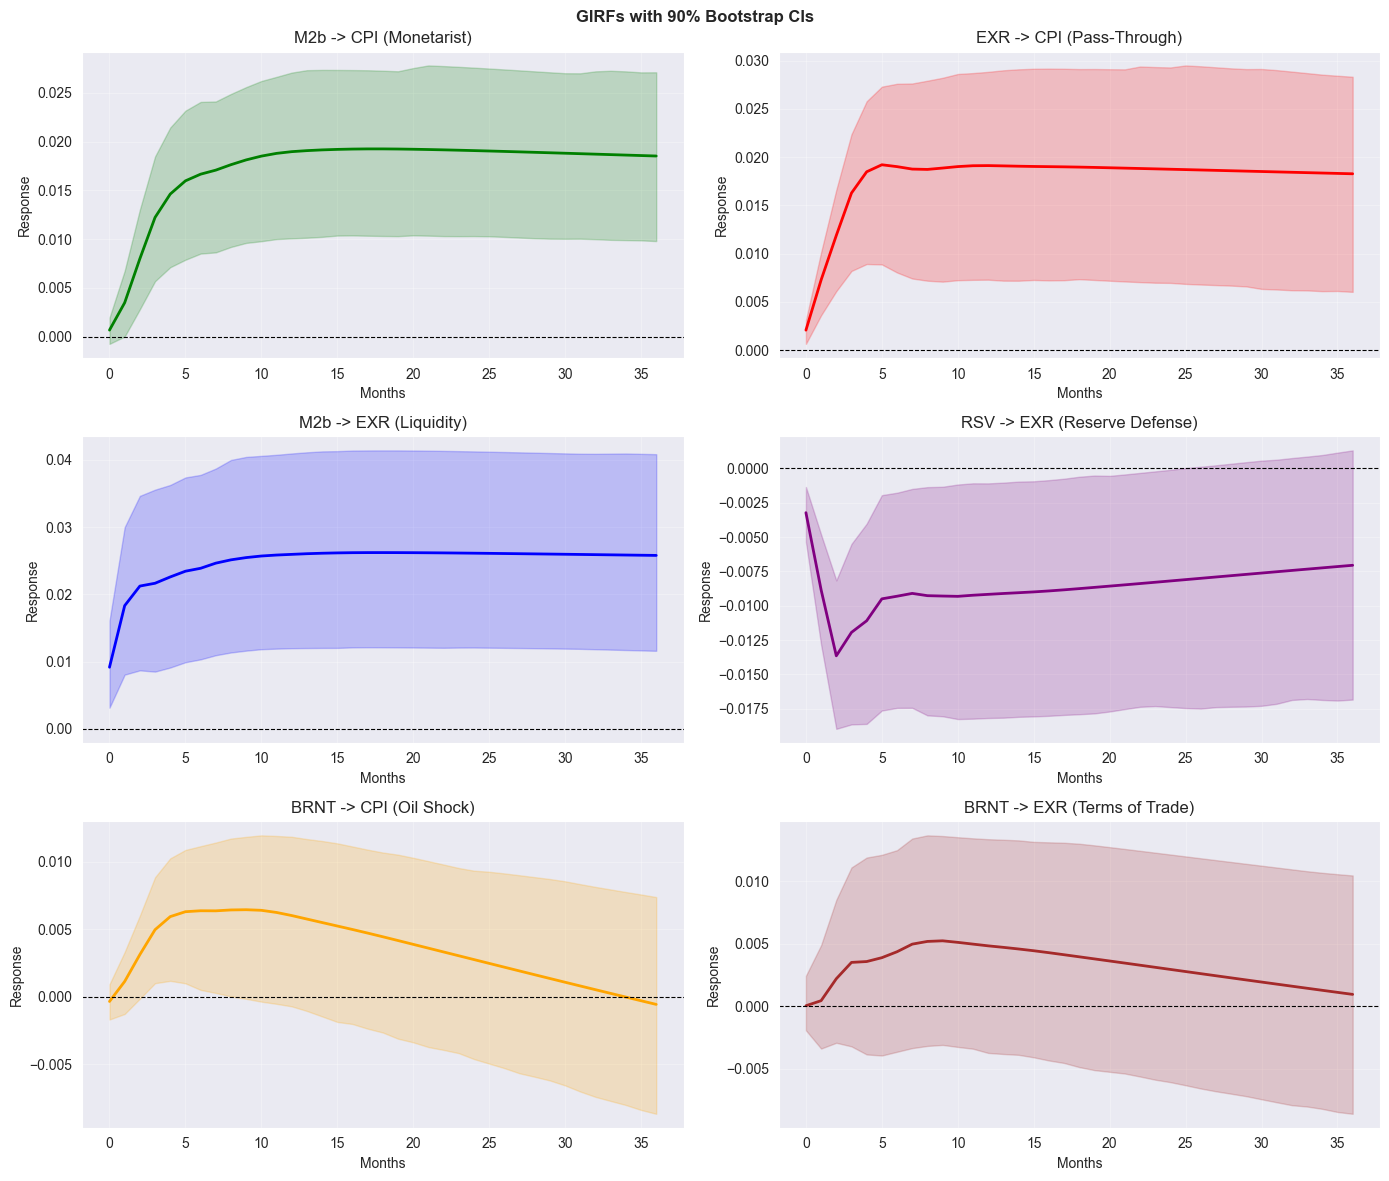

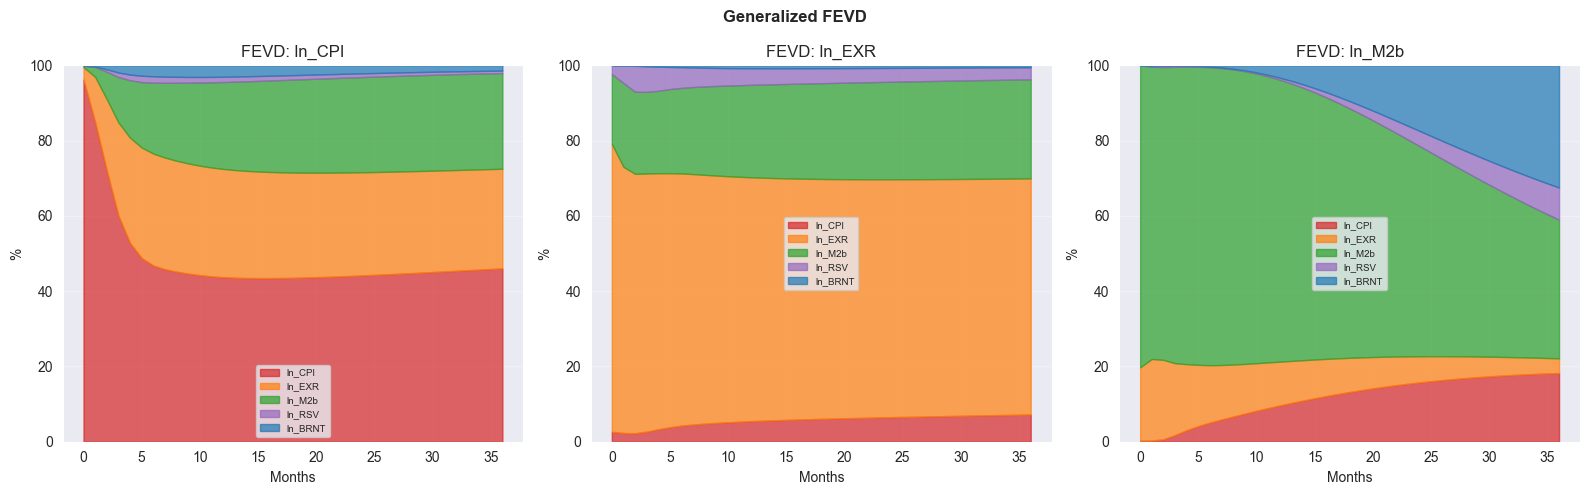

In [40]:
# COMBINED GIRF ANALYSIS WITH BOOTSTRAP CIs
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM

np.random.seed(42)

coint_vars = ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
data_coint = df_transformed[coint_vars].dropna()
endog_vars = coint_vars
vecm_lag = 3
coint_rank = 1
n_eq = len(endog_vars)
periods = 36
var_to_idx = {v: i for i, v in enumerate(endog_vars)}

# Fit VECM
vecm_model = VECM(data_coint, k_ar_diff=vecm_lag, coint_rank=coint_rank, deterministic='ci')
vecm_result = vecm_model.fit()
residuals = vecm_result.resid
n_resid = len(residuals)

# GIRF function
def compute_girf(ma_coefs, sigma):
    n_periods, n_vars, _ = ma_coefs.shape
    girf = np.zeros((n_periods, n_vars, n_vars))
    for h in range(n_periods):
        for j in range(n_vars):
            girf[h, :, j] = ma_coefs[h] @ sigma[:, j] / np.sqrt(sigma[j, j])
    return girf

# Original GIRF
irf_orig = vecm_result.irf(periods=periods)
sigma_orig = np.cov(residuals.T)
girf_orig = compute_girf(irf_orig.irfs, sigma_orig)

# Extract VECM parameters for bootstrap reconstruction
alpha_hat = vecm_result.alpha
beta_hat = vecm_result.beta
gamma_hat = vecm_result.gamma
has_const_in_beta = (beta_hat.shape[0] == n_eq + 1)

# Bootstrap
n_bootstrap = 500
girf_bootstrap = np.zeros((n_bootstrap, periods + 1, n_eq, n_eq))
success_count = 0

for b in range(n_bootstrap):
    if (b + 1) % 100 == 0:
        print(f"Bootstrap: {b+1}/{n_bootstrap}")

    idx_boot = np.random.choice(n_resid, size=n_resid, replace=True)
    resid_boot = residuals[idx_boot]

    y_levels = data_coint.values.copy()
    n_total = len(y_levels)
    start = vecm_lag + 1

    for t_idx in range(n_resid):
        t = start + t_idx
        if t >= n_total:
            break

        # Error correction term
        if has_const_in_beta:
            y_aug = np.append(y_levels[t-1], 1.0)
        else:
            y_aug = y_levels[t-1]
        ec_term = alpha_hat @ (beta_hat.T @ y_aug)

        # Short-run dynamics
        sr_term = np.zeros(n_eq)
        for lag in range(vecm_lag):
            t_lag = t - 1 - lag
            if t_lag > 0:
                dy_lag = y_levels[t_lag] - y_levels[t_lag - 1]
                sr_term += gamma_hat[:, lag*n_eq:(lag+1)*n_eq] @ dy_lag

        delta_y = ec_term.flatten() + sr_term + resid_boot[t_idx]
        y_levels[t] = y_levels[t-1] + delta_y

    try:
        data_boot = pd.DataFrame(y_levels, columns=coint_vars, index=data_coint.index)
        fit_boot = VECM(data_boot, k_ar_diff=vecm_lag, coint_rank=coint_rank,
                        deterministic='ci').fit()
        sigma_boot = np.cov(fit_boot.resid.T)
        girf_bootstrap[b] = compute_girf(fit_boot.irf(periods=periods).irfs, sigma_boot)
        success_count += 1
    except:
        girf_bootstrap[b] = girf_orig

print(f"Bootstrap success: {success_count}/{n_bootstrap}")

# Channels
key_channels = [
    ('ln_M2b',  'ln_CPI',  'M2b -> CPI',  'Monetarist'),
    ('ln_EXR',  'ln_CPI',  'EXR -> CPI',  'Pass-Through'),
    ('ln_M2b',  'ln_EXR',  'M2b -> EXR',  'Liquidity'),
    ('ln_RSV',  'ln_EXR',  'RSV -> EXR',  'Reserve Defense'),
    ('ln_BRNT', 'ln_CPI',  'BRNT -> CPI', 'Oil Shock'),
    ('ln_BRNT', 'ln_EXR',  'BRNT -> EXR', 'Terms of Trade'),
]

report_horizons = [1, 3, 6, 12, 24, 36]

# Compute CIs and results for each channel
results = {}
for imp, resp, label, theory in key_channels:
    i, j = var_to_idx[imp], var_to_idx[resp]
    r = girf_orig[:, j, i]
    r_boot = girf_bootstrap[:, :, j, i]
    ci_lo = np.percentile(r_boot, 5, axis=0)
    ci_hi = np.percentile(r_boot, 95, axis=0)
    pk = np.argmax(np.abs(r))

    first_sig = None
    for h in range(1, periods + 1):
        if ci_lo[h] > 0 or ci_hi[h] < 0:
            first_sig = h
            break

    t50 = None
    if abs(r[pk]) > 1e-8:
        for h in range(1, periods + 1):
            if abs(r[h]) >= 0.50 * abs(r[pk]):
                t50 = h
                break

    results[label] = {
        'r': r, 'ci_lo': ci_lo, 'ci_hi': ci_hi,
        'peak_val': r[pk], 'peak_month': pk,
        'first_sig': first_sig, 't50': t50,
        'direction': 'POS' if r[12] > 0 else 'NEG',
        'theory': theory
    }

# DIRECTION
print("\nDIRECTION")
print(f"{'Channel':<20} {'Dir':>5} {'Sig?':>5} {'First Sig':>10} {'Theory':<20}")
for label, res in results.items():
    sig = "YES" if res['first_sig'] else "NO"
    fs = f"M{res['first_sig']}" if res['first_sig'] else "---"
    print(f"{label:<20} {res['direction']:>5} {sig:>5} {fs:>10} {res['theory']:<20}")

# MAGNITUDE
print("\nMAGNITUDE (point estimate, * = significant at 90%)")
print(f"{'Channel':<20}", end="")
for h in report_horizons:
    print(f"{'M'+str(h):>10}", end="")
print(f"{'Peak':>10} {'At':>5}")

for label, res in results.items():
    r, ci_lo, ci_hi = res['r'], res['ci_lo'], res['ci_hi']
    print(f"{label:<20}", end="")
    for h in report_horizons:
        sig = "*" if (ci_lo[h] > 0 or ci_hi[h] < 0) else " "
        print(f"{r[h]:>9.4f}{sig}", end="")
    print(f"{res['peak_val']:>10.4f} {'M'+str(res['peak_month']):>5}")

# Elasticity at 12 months
print("\nELASTICITY AT 12 MONTHS")
print(f"{'Channel':<20} {'Value':>8} {'90% CI':>22} {'Interpretation'}")
for imp, resp, label, theory in key_channels:
    i, j = var_to_idx[imp], var_to_idx[resp]
    r12 = girf_orig[12, j, i]
    lo = np.percentile(girf_bootstrap[:, 12, j, i], 5)
    hi = np.percentile(girf_bootstrap[:, 12, j, i], 95)
    sig = lo > 0 or hi < 0
    interp = f"1% {imp[3:]} -> {r12*100:.2f}% {resp[3:]}" if sig else "Not significant"
    print(f"{label:<20} {r12:>8.4f} [{lo:+.4f}, {hi:+.4f}]  {interp}")

# TIMING
print("\nTIMING")
print(f"{'Channel':<20} {'1st Sig':>8} {'50% Peak':>10} {'Peak At':>8} {'Stable':>8}")
for label, res in results.items():
    fs = f"M{res['first_sig']}" if res['first_sig'] else "---"
    t50 = f"M{res['t50']}" if res['t50'] else "---"
    pk = f"M{res['peak_month']}"
    print(f"{label:<20} {fs:>8} {t50:>10} {pk:>8}")

# FEVD
fevd_array = np.zeros((periods + 1, n_eq, n_eq))
for h in range(periods + 1):
    for j in range(n_eq):
        for k in range(n_eq):
            fevd_array[h, j, k] = np.sum(girf_orig[:h+1, j, k] ** 2)
    row_sums = fevd_array[h].sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1
    fevd_array[h] /= row_sums

print("\nFEVD (%)")
for target in ['ln_CPI', 'ln_EXR', 'ln_M2b']:
    ti = var_to_idx[target]
    print(f"\n{target}:")
    print(f"{'H':>5}" + ''.join(f"{v:>10}" for v in endog_vars))
    for h in report_horizons:
        print(f"{h:>4}m" + ''.join(f"{fevd_array[h,ti,j]*100:>9.1f}%" for j in range(n_eq)))

# Plot IRFs with CIs
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()
colors = ['green', 'red', 'blue', 'purple', 'orange', 'brown']

for idx, (imp, resp, label, theory) in enumerate(key_channels):
    ax = axes[idx]
    res = results[label]
    t_ax = np.arange(periods + 1)

    ax.plot(t_ax, res['r'], lw=2, color=colors[idx])
    ax.fill_between(t_ax, res['ci_lo'], res['ci_hi'], alpha=0.2, color=colors[idx])
    ax.axhline(0, color='black', ls='--', lw=0.8)
    ax.set_title(f'{label} ({theory})')
    ax.set_xlabel('Months')
    ax.set_ylabel('Response')
    ax.grid(True, alpha=0.3)

plt.suptitle('GIRFs with 90% Bootstrap CIs', fontweight='bold')
plt.tight_layout()
plt.savefig('girf_bootstrap.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot FEVD
colors_fevd = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd', '#1f77b4']
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for idx, target in enumerate(['ln_CPI', 'ln_EXR', 'ln_M2b']):
    ax = axes[idx]
    ti = var_to_idx[target]
    bottom = np.zeros(periods + 1)
    for j, var in enumerate(endog_vars):
        vals = fevd_array[:, ti, j] * 100
        ax.fill_between(range(periods+1), bottom, bottom+vals, label=var, color=colors_fevd[j], alpha=0.7)
        bottom += vals
    ax.set_title(f'FEVD: {target}')
    ax.set_xlabel('Months')
    ax.set_ylabel('%')
    ax.set_ylim(0, 100)
    ax.legend(fontsize=7)
    ax.grid(True, alpha=0.3)

plt.suptitle('Generalized FEVD', fontweight='bold')
plt.tight_layout()
plt.savefig('gfevd.png', dpi=150, bbox_inches='tight')
plt.show()

GRANGER CAUSALITY TEST (VECM-based)
Cause      -> Effect      Test Stat    p-value          Result
ln_CPI     -> ln_EXR         0.2175     0.9287              NO
ln_CPI     -> ln_M2b         1.2594     0.2841              NO
ln_CPI     -> ln_RSV         0.2328     0.9200              NO
ln_CPI     -> ln_BRNT        0.7027     0.5901              NO
ln_EXR     -> ln_CPI         8.5292     0.0000         YES ***
ln_EXR     -> ln_M2b         2.4340     0.0457          YES **
ln_EXR     -> ln_RSV         0.5700     0.6845              NO
ln_EXR     -> ln_BRNT        1.9111     0.1063              NO
ln_M2b     -> ln_CPI         1.4939     0.2017              NO
ln_M2b     -> ln_EXR         4.3270     0.0018         YES ***
ln_M2b     -> ln_RSV         1.0610     0.3745              NO
ln_M2b     -> ln_BRNT        1.0145     0.3986              NO
ln_RSV     -> ln_CPI         0.8927     0.4676              NO
ln_RSV     -> ln_EXR         8.1459     0.0000         YES ***
ln_RSV     -> ln_M2

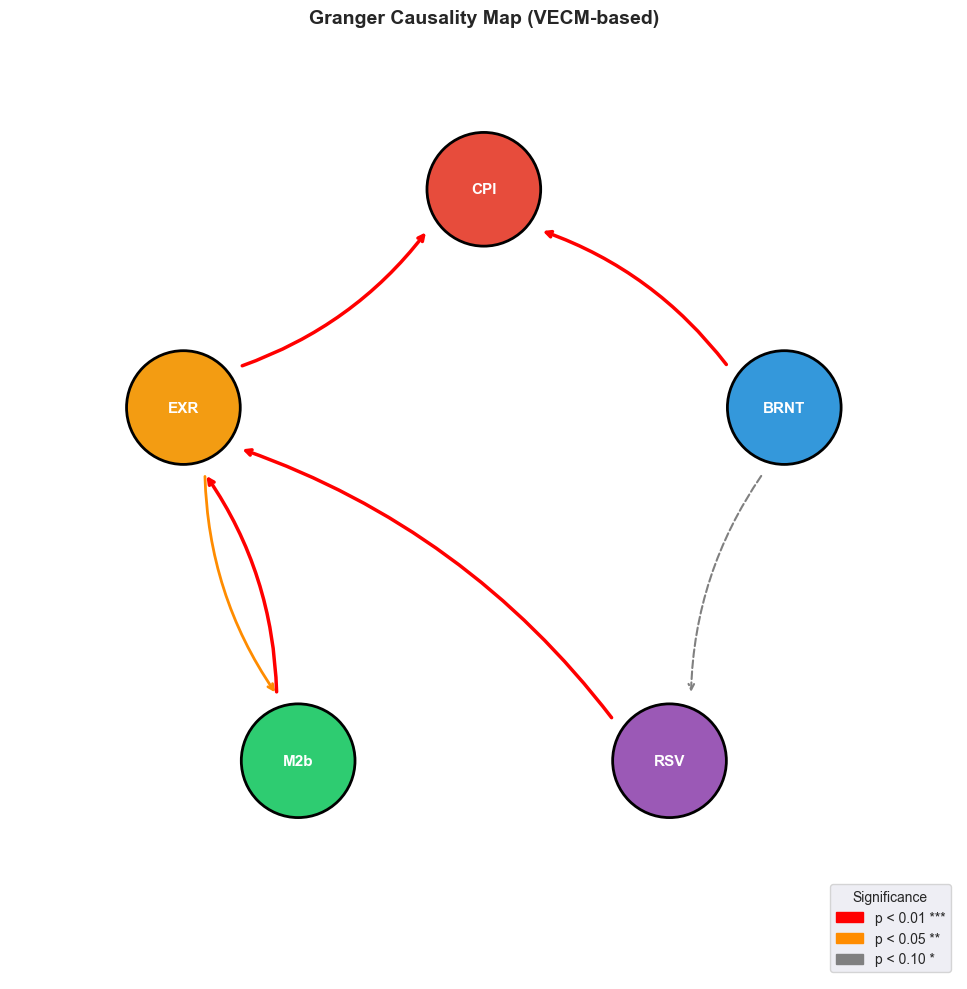


KEY FINDINGS FOR OBJECTIVES:
  M2b->CPI: p=0.2017 -> Granger causes? NO
  EXR->CPI: p=0.0000 -> Granger causes? YES
  M2b->EXR: p=0.0018 -> Granger causes? YES


In [35]:
# GRANGER CAUSALITY + CAUSALITY MAP
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

coint_vars = ['ln_CPI', 'ln_EXR', 'ln_M2b', 'ln_RSV', 'ln_BRNT']
data_coint = df_transformed[coint_vars].dropna()
vecm_lag = 3
coint_rank = 1

# Fit VECM
vecm_model = VECM(data_coint, k_ar_diff=vecm_lag, coint_rank=coint_rank, deterministic='ci')
vecm_result = vecm_model.fit()

# Granger Causality Tests
print("GRANGER CAUSALITY TEST (VECM-based)")
print(f"{'Cause':<10} -> {'Effect':<10} {'Test Stat':>10} {'p-value':>10} {'Result':>15}")

gc_results = []
for i, cause in enumerate(coint_vars):
    for j, effect in enumerate(coint_vars):
        if i == j:
            continue
        try:
            test = vecm_result.test_granger_causality(caused=j, causing=i)
            stat = test.test_statistic
            pval = test.pvalue
            sig = "YES ***" if pval < 0.01 else "YES **" if pval < 0.05 else "YES *" if pval < 0.10 else "NO"
            print(f"{cause:<10} -> {effect:<10} {stat:>10.4f} {pval:>10.4f} {sig:>15}")
            gc_results.append({
                'cause': cause, 'effect': effect,
                'stat': stat, 'pval': pval,
                'sig_01': pval < 0.01, 'sig_05': pval < 0.05, 'sig_10': pval < 0.10
            })
        except:
            print(f"{cause:<10} -> {effect:<10} {'FAILED':>10}")

gc_df = pd.DataFrame(gc_results)

# Summary matrix
print("\nSIGNIFICANCE MATRIX (p-values)")
print(f"{'':>10}", end="")
for v in coint_vars:
    print(f"{v:>10}", end="")
print()
for cause in coint_vars:
    print(f"{cause:<10}", end="")
    for effect in coint_vars:
        if cause == effect:
            print(f"{'---':>10}", end="")
        else:
            row = gc_df[(gc_df['cause'] == cause) & (gc_df['effect'] == effect)]
            if len(row) > 0:
                p = row['pval'].values[0]
                star = "***" if p < 0.01 else "**" if p < 0.05 else "*" if p < 0.10 else ""
                print(f"{p:>7.3f}{star:>3}", end="")
            else:
                print(f"{'N/A':>10}", end="")
    print()

# Causality Map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.axis('off')

# Node positions in a circle
n = len(coint_vars)
angles = np.linspace(np.pi/2, np.pi/2 + 2*np.pi, n, endpoint=False)
positions = {v: (np.cos(a), np.sin(a)) for v, a in zip(coint_vars, angles)}

# Node colors
node_colors = {
    'ln_CPI': '#e74c3c', 'ln_EXR': '#f39c12', 'ln_M2b': '#2ecc71',
    'ln_RSV': '#9b59b6', 'ln_BRNT': '#3498db'
}

# Draw nodes
for var, (x, y) in positions.items():
    circle = plt.Circle((x, y), 0.18, color=node_colors[var], ec='black', lw=2, zorder=5)
    ax.add_patch(circle)
    ax.text(x, y, var.replace('ln_', ''), ha='center', va='center',
            fontsize=11, fontweight='bold', color='white', zorder=6)

# Draw arrows for significant causality
for _, row in gc_df.iterrows():
    if not row['sig_10']:
        continue

    x1, y1 = positions[row['cause']]
    x2, y2 = positions[row['effect']]

    # Shorten arrow to not overlap nodes
    dx, dy = x2 - x1, y2 - y1
    dist = np.sqrt(dx**2 + dy**2)
    ux, uy = dx/dist, dy/dist
    x1s, y1s = x1 + ux * 0.22, y1 + uy * 0.22
    x2s, y2s = x2 - ux * 0.22, y2 - uy * 0.22

    # Arrow style by significance
    if row['sig_01']:
        color, lw, style = 'red', 2.5, '-'
    elif row['sig_05']:
        color, lw, style = 'darkorange', 2.0, '-'
    else:
        color, lw, style = 'gray', 1.5, '--'

    # Slight curve offset for bidirectional arrows
    mid_x = (x1s + x2s) / 2 + uy * 0.08
    mid_y = (y1s + y2s) / 2 - ux * 0.08

    ax.annotate('', xy=(x2s, y2s), xytext=(x1s, y1s),
                arrowprops=dict(arrowstyle='->', color=color, lw=lw,
                                linestyle=style, connectionstyle='arc3,rad=0.15'))

# Legend
legend_elements = [
    mpatches.Patch(color='red', label='p < 0.01 ***'),
    mpatches.Patch(color='darkorange', label='p < 0.05 **'),
    mpatches.Patch(color='gray', label='p < 0.10 *'),
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10, title='Significance')
ax.set_title('Granger Causality Map (VECM-based)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('granger_causality_map.png', dpi=150, bbox_inches='tight')
plt.show()

# Key findings for your objectives
print("\nKEY FINDINGS FOR OBJECTIVES:")
for imp, eff, label in [('ln_M2b','ln_CPI','M2b->CPI'), ('ln_EXR','ln_CPI','EXR->CPI'), ('ln_M2b','ln_EXR','M2b->EXR')]:
    row = gc_df[(gc_df['cause']==imp) & (gc_df['effect']==eff)]
    if len(row) > 0:
        p = row['pval'].values[0]
        sig = "YES" if p < 0.05 else "WEAK" if p < 0.10 else "NO"
        print(f"  {label}: p={p:.4f} -> Granger causes? {sig}")

DIEBOLD-MARIANO TEST (vs Naive baseline)

ln_CPI (H0: model = Naive, H1: model != Naive):
  Model                   DM stat    p-value    Sig    Better?
  arima                    -0.448     0.6573     No         No
  vecm                      0.255     0.8005     No        Yes
  lstm                     -3.757     0.0007    Yes         No
  hybrid_weighted           0.068     0.9462     No        Yes
  hybrid_simple            -1.744     0.0905     No         No

ln_EXR (H0: model = Naive, H1: model != Naive):
  Model                   DM stat    p-value    Sig    Better?
  arima                    -1.549     0.1310     No         No
  vecm                     -1.280     0.2095     No         No
  lstm                     -2.160     0.0381    Yes         No
  hybrid_weighted          -0.949     0.3493     No         No
  hybrid_simple            -0.818     0.4195     No         No

FINAL MODEL RANKING

ln_CPI:
  Rank   Model                      RMSE     MASE     Dir%
  1      vecm   

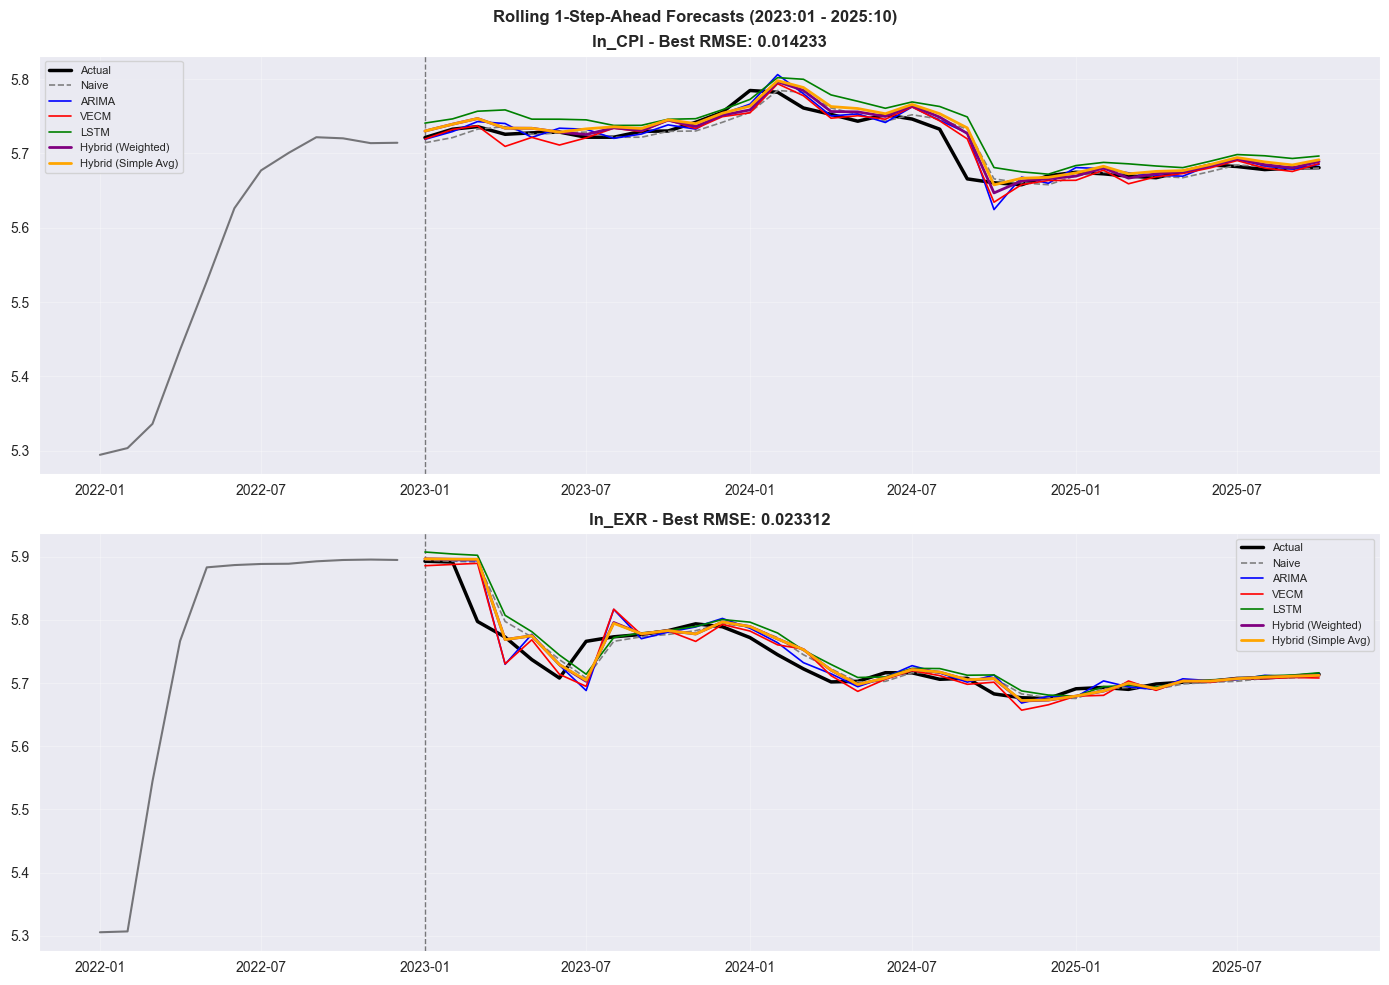

In [41]:
# Recreate train/test split
split_date = '2023-01-01'
train = df_transformed[df_transformed.index < split_date]
test = df_transformed[df_transformed.index >= split_date]
n_test = len(test)

# Derive date labels from actual data
test_start = test.index[0].strftime('%Y:%m')
test_end = test.index[-1].strftime('%Y:%m')

final_models = ['naive', 'arima', 'vecm', 'lstm', 'hybrid_weighted', 'hybrid_simple']

# DIEBOLD-MARIANO TEST
from scipy import stats

print("DIEBOLD-MARIANO TEST (vs Naive baseline)")

def diebold_mariano(actual, pred1, pred2, h=1):
    e1 = actual - pred1
    e2 = actual - pred2
    d = e2**2 - e1**2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    if h > 1:
        for k in range(1, h):
            gamma_k = np.mean((d[k:] - mean_d) * (d[:-k] - mean_d))
            var_d += 2 * gamma_k / len(d)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    p_value = 2 * (1 - stats.t.cdf(abs(dm_stat), df=len(d) - 1))
    return dm_stat, p_value

for var in target_vars:
    actual = actuals[var]
    naive_pred = forecasts[f'{var}_naive'][:n_test]

    print(f"\n{var} (H0: model = Naive, H1: model != Naive):")
    print(f"  {'Model':<20} {'DM stat':>10} {'p-value':>10} {'Sig':>6} {'Better?':>10}")

    for m in ['arima', 'vecm', 'lstm', 'hybrid_weighted', 'hybrid_simple']:
        pred = forecasts[f'{var}_{m}'][:n_test]
        dm, pv = diebold_mariano(actual, pred, naive_pred)
        sig = 'Yes' if pv < 0.05 else 'No'
        better = 'Yes' if dm > 0 else 'No'
        print(f"  {m:<20} {dm:>10.3f} {pv:>10.4f} {sig:>6} {better:>10}")

# FINAL RANKING
print("\nFINAL MODEL RANKING")

for var in target_vars:
    actual = actuals[var]
    naive_mae = mean_absolute_error(actual, forecasts[f'{var}_naive'])

    print(f"\n{var}:")
    print(f"  {'Rank':<6} {'Model':<20} {'RMSE':>10} {'MASE':>8} {'Dir%':>8}")

    results = []
    for m in final_models:
        pred = forecasts[f'{var}_{m}'][:n_test]
        met = calc_metrics(actual, pred, naive_mae)
        results.append((m, met))

    results.sort(key=lambda x: x[1]['RMSE'])

    for rank, (m, met) in enumerate(results, 1):
        marker = ' <-' if rank == 1 else ''
        print(f"  {rank:<6} {m:<20} {met['RMSE']:>10.6f} {met['MASE']:>8.4f} "
              f"{met['Dir%']:>8.1f}{marker}")

# FORECAST PLOTS
fig, axes = plt.subplots(len(target_vars), 1, figsize=(14, 5 * len(target_vars)))
if len(target_vars) == 1:
    axes = [axes]

colors = {'naive': 'gray', 'arima': 'blue', 'vecm': 'red',
          'lstm': 'green', 'hybrid_weighted': 'purple', 'hybrid_simple': 'orange'}
model_labels = {'naive': 'Naive', 'arima': 'ARIMA', 'vecm': 'VECM',
                'lstm': 'LSTM', 'hybrid_weighted': 'Hybrid (Weighted)',
                'hybrid_simple': 'Hybrid (Simple Avg)'}

for i, var in enumerate(target_vars):
    ax = axes[i]
    train_tail = train[var].iloc[-12:]
    ax.plot(train_tail.index, train_tail.values, 'k-', lw=1.5, alpha=0.5)
    ax.axvline(x=pd.Timestamp(split_date), color='black', ls='--', lw=1, alpha=0.5)
    ax.plot(test.index, actuals[var], 'k-', lw=2.5, label='Actual')

    for m in final_models:
        pred = forecasts[f'{var}_{m}'][:n_test]
        lw = 2 if m in ['hybrid_weighted', 'hybrid_simple'] else 1.2
        ls = '--' if m == 'naive' else '-'
        ax.plot(test.index, pred, ls, color=colors[m], lw=lw, label=model_labels[m])

    rmse_best = min(
        np.sqrt(mean_squared_error(actuals[var], forecasts[f'{var}_{m}'][:n_test]))
        for m in final_models)
    ax.set_title(f'{var} - Best RMSE: {rmse_best:.6f}', fontweight='bold')
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)

plt.suptitle(f'Rolling 1-Step-Ahead Forecasts ({test_start} - {test_end})', fontweight='bold')
plt.tight_layout()
plt.show()


CPI Index:
  Model                       MAE       RMSE    MAPE%     MASE
  naive                      2.69       4.47   0.8846   1.0000
  arima                      3.14       4.66   1.0400   1.1697
  vecm                       2.95       4.31   0.9717   1.0971
  lstm                       5.72       7.14   1.8891   2.1283
  hybrid_weighted            2.99       4.47   0.9828   1.1117
  hybrid_simple              3.30       4.96   1.0871   1.2289

EXR (Birr/USD):
  Model                       MAE       RMSE    MAPE%     MASE
  naive                      4.36       7.64   1.3903   1.0000
  arima                      5.09       8.64   1.6172   1.1667
  vecm                       5.12       8.36   1.6261   1.1723
  lstm                       5.26       8.73   1.6694   1.2050
  hybrid_weighted            4.46       7.94   1.4182   1.0222
  hybrid_simple              4.42       7.90   1.4047   1.0126

CPI Index: Actual vs Forecast Values
  Date             Actual      Naive      ARIMA    

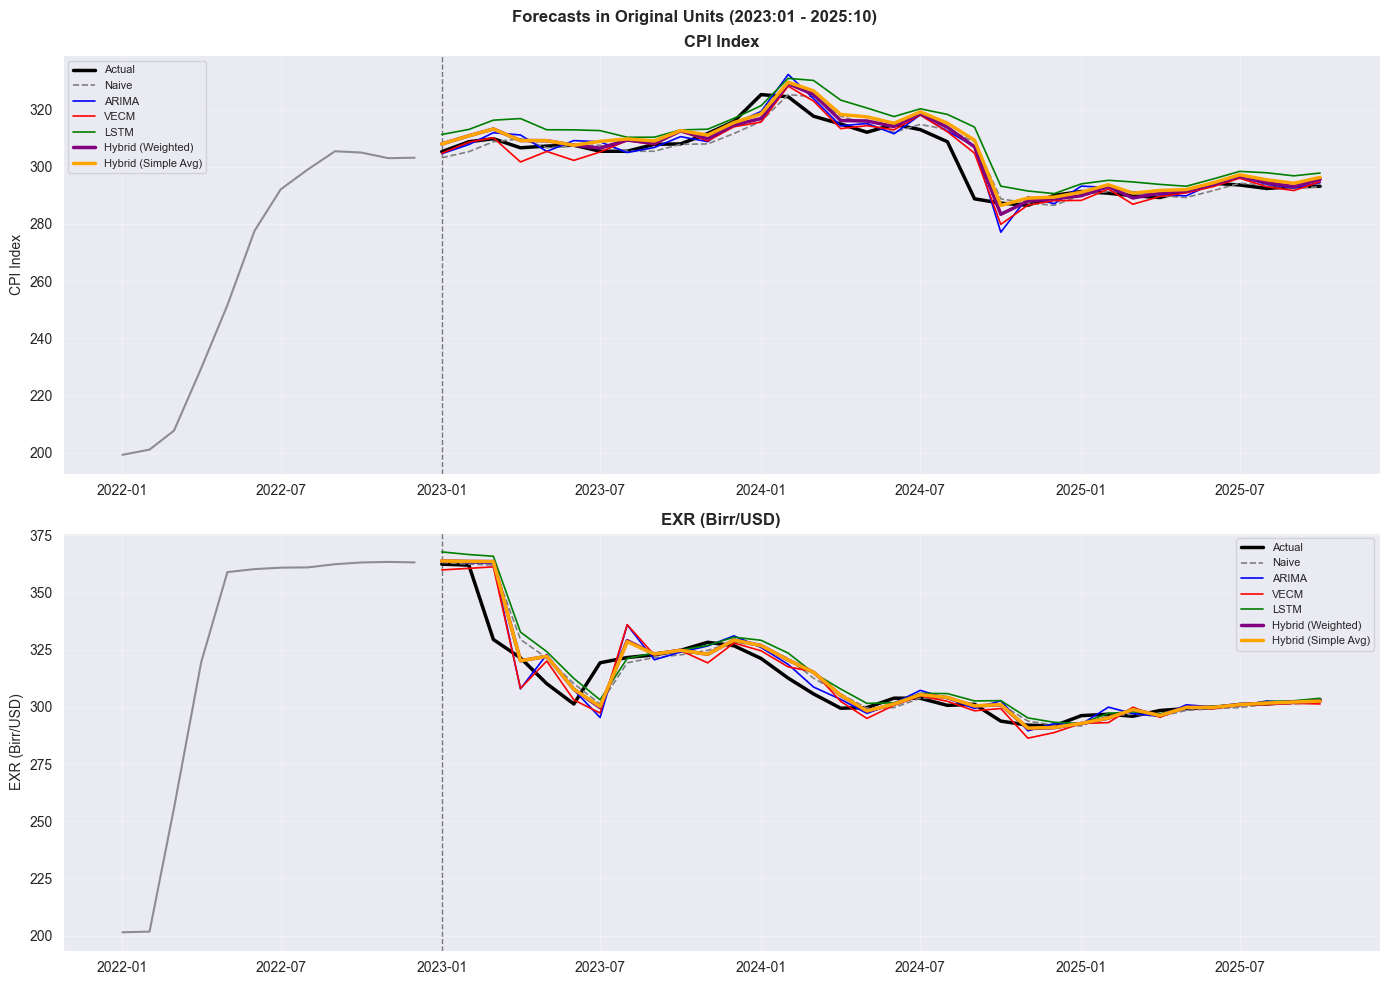


FORECAST ERROR ANALYSIS

CPI Index - Error Statistics:
  Model                  Mean Err    Std Err    Min Err    Max Err       Bias
  naive                    -0.294      4.532    -19.968      9.379       Over
  arima                    -1.150      4.581    -18.371     10.170       Over
  vecm                     -0.042      4.373    -15.963      9.610       Over
  lstm                     -5.491      4.638    -25.091      3.878       Over
  hybrid_weighted          -1.812      4.145    -18.183      8.375       Over
  hybrid_simple            -2.750      4.185    -20.493      6.757       Over

EXR (Birr/USD) - Error Statistics:
  Model                  Mean Err    Std Err    Min Err    Max Err       Bias
  naive                    -1.768      7.548    -32.506     18.029       Over
  arima                    -1.669      8.604    -33.288     23.928       Over
  vecm                     -0.353      8.477    -31.750     21.976       Over
  lstm                     -3.788      7.987    -3

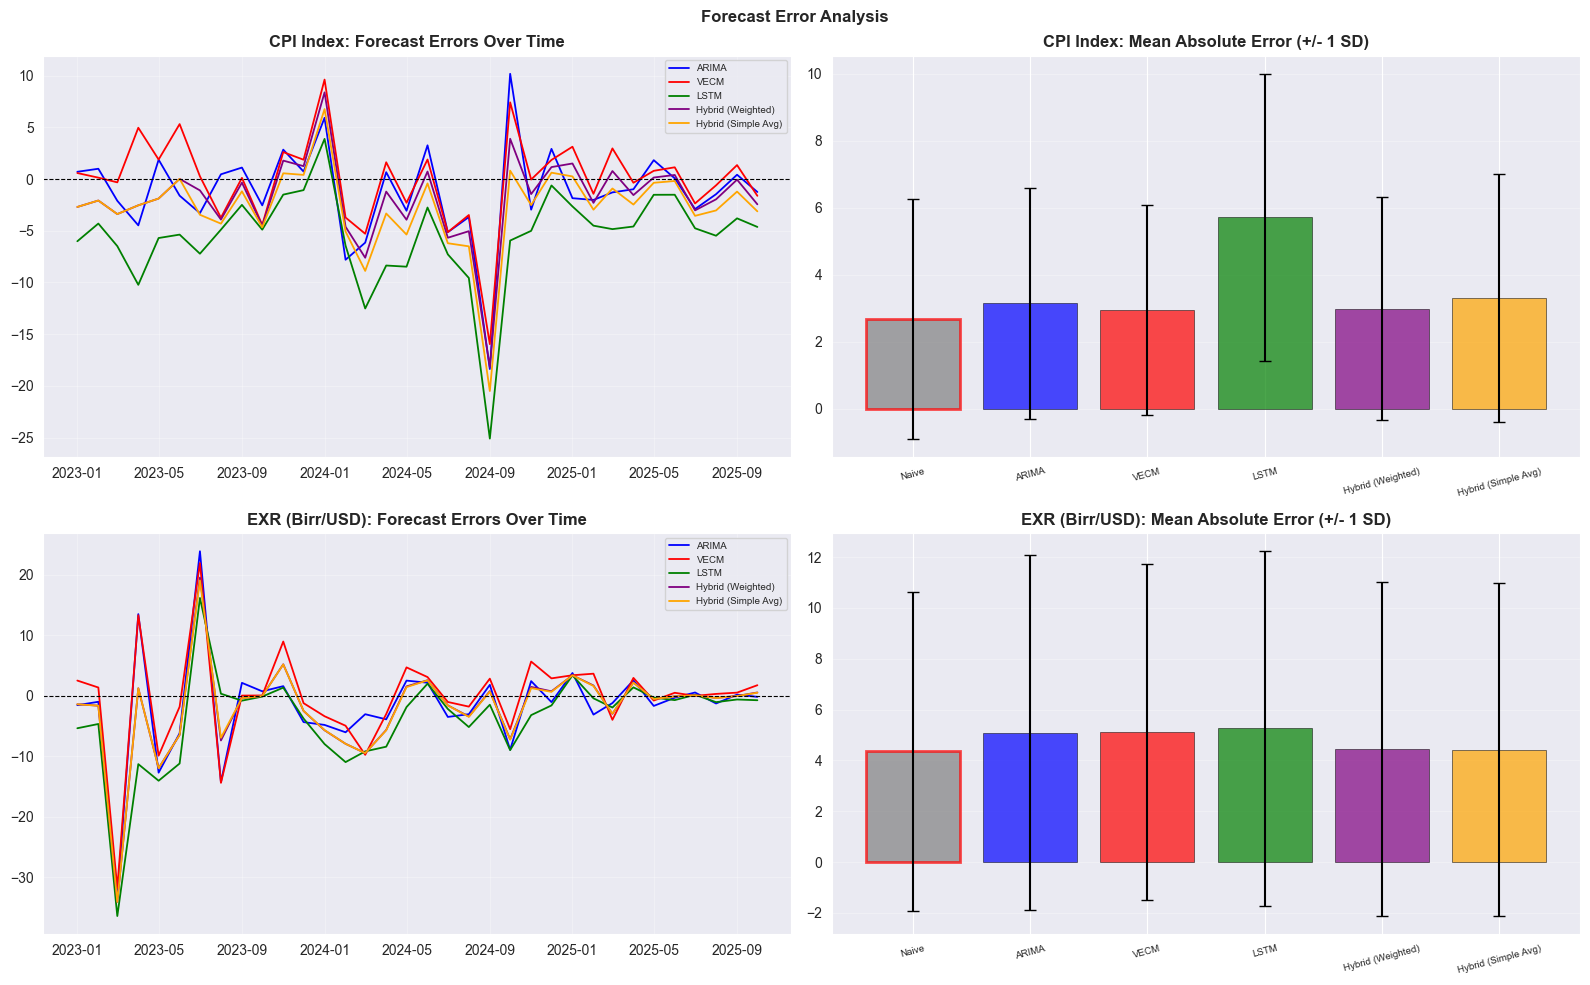

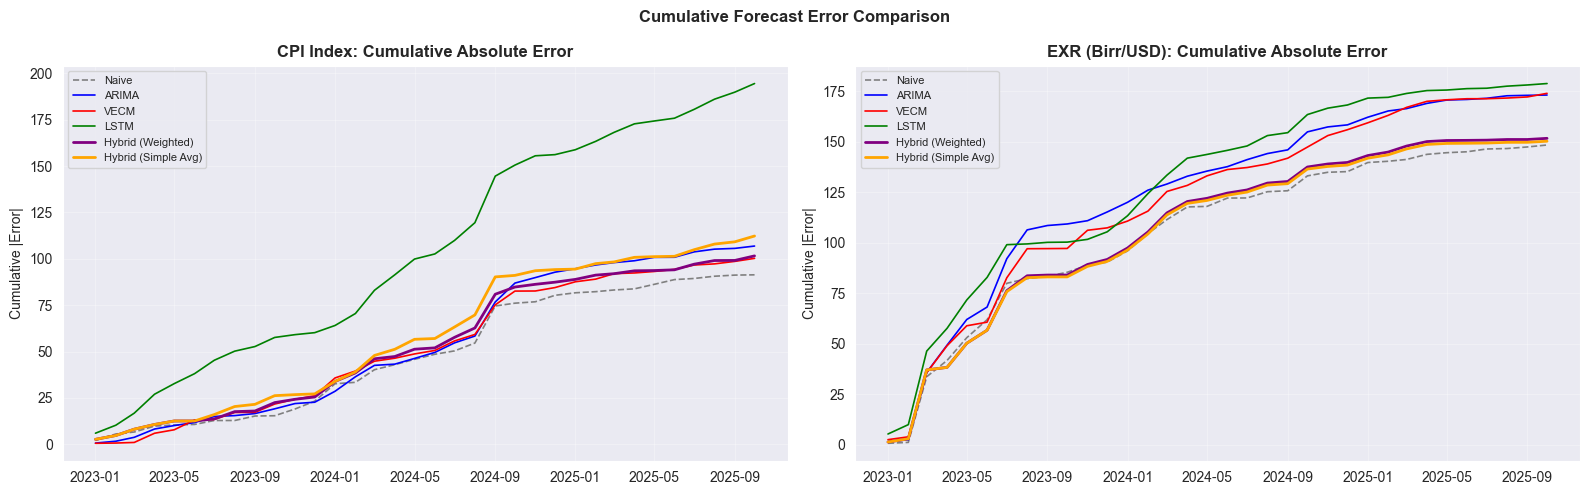

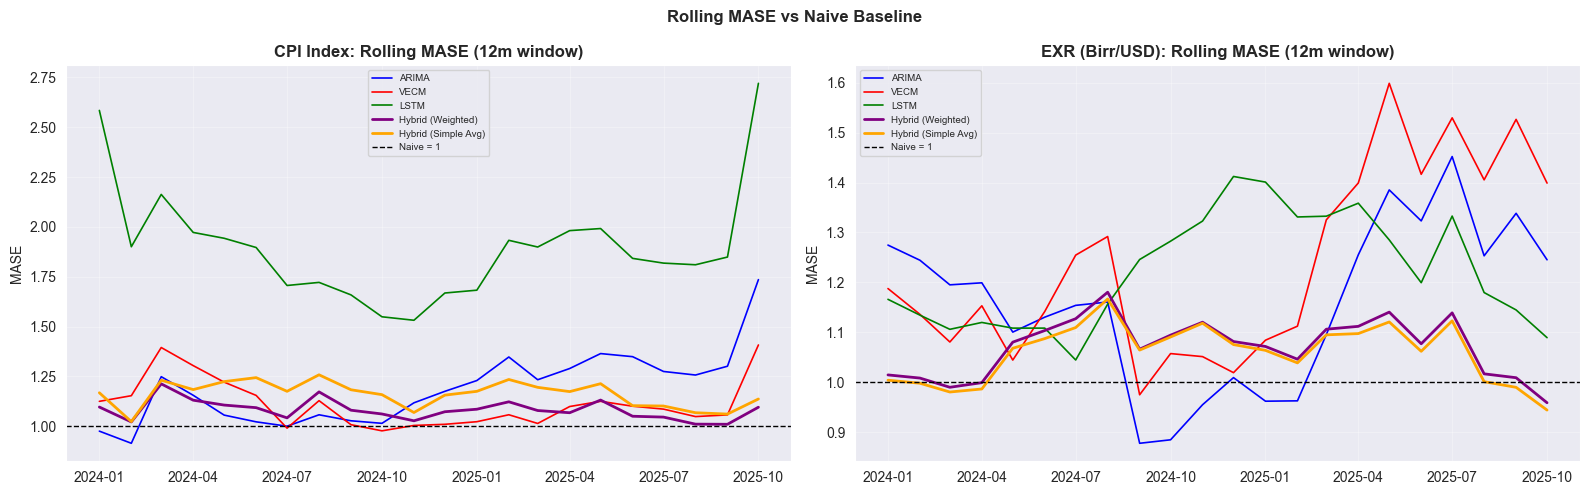


SUMMARY

CPI Index:
  Actual range: 286.51 - 325.24
  Actual mean:  303.01
  Best model:   VECM (RMSE = 4.31)
  RMSE as % of mean: 1.42%

EXR (Birr/USD):
  Actual range: 291.68 - 362.42
  Actual mean:  310.27
  Best model:   Naive (RMSE = 7.64)
  RMSE as % of mean: 2.46%


In [42]:
# FORECASTS IN ORIGINAL UNITS & FORECAST ERROR ANALYSIS

var_labels = {'ln_CPI': 'CPI Index', 'ln_EXR': 'EXR (Birr/USD)'}
test_start = test.index[0].strftime('%Y:%m')
test_end = test.index[-1].strftime('%Y:%m')

actuals_orig = {}
forecasts_orig = {}

for var in target_vars:
    actuals_orig[var] = np.exp(actuals[var])
    for m in final_models:
        forecasts_orig[f'{var}_{m}'] = np.exp(forecasts[f'{var}_{m}'][:n_test])

# Summary Table: Original Units
for var in target_vars:
    actual_o = actuals_orig[var]
    naive_mae_o = mean_absolute_error(actual_o, forecasts_orig[f'{var}_naive'])

    print(f"\n{var_labels[var]}:")
    print(f"  {'Model':<20} {'MAE':>10} {'RMSE':>10} {'MAPE%':>8} {'MASE':>8}")

    for m in final_models:
        pred_o = forecasts_orig[f'{var}_{m}']
        mae = mean_absolute_error(actual_o, pred_o)
        rmse = np.sqrt(mean_squared_error(actual_o, pred_o))
        mape = np.mean(np.abs((actual_o - pred_o) / actual_o)) * 100
        mase = mae / naive_mae_o
        print(f"  {m:<20} {mae:>10.2f} {rmse:>10.2f} {mape:>8.4f} {mase:>8.4f}")

# Actual vs Forecast Values Table
for var in target_vars:
    print(f"\n{var_labels[var]}: Actual vs Forecast Values")
    print(f"  {'Date':<12} {'Actual':>10} {'Naive':>10} {'ARIMA':>10} {'VECM':>10} "
          f"{'LSTM':>10} {'Hybrid-W':>10} {'Hybrid-S':>10}")

    for t in range(n_test):
        date_str = test.index[t].strftime('%Y-%m')
        actual_v = actuals_orig[var][t]
        row = f"  {date_str:<12} {actual_v:>10.2f}"
        for m in final_models:
            row += f" {forecasts_orig[f'{var}_{m}'][t]:>10.2f}"
        print(row)

# Forecast Plots in Original Units
n_vars = len(target_vars)
fig, axes = plt.subplots(n_vars, 1, figsize=(14, 5 * n_vars))
if n_vars == 1:
    axes = [axes]

for i, var in enumerate(target_vars):
    ax = axes[i]
    train_tail = np.exp(train[var].iloc[-12:])
    ax.plot(train_tail.index, train_tail.values, 'k-', lw=1.5, alpha=0.4)
    ax.axvline(x=pd.Timestamp(split_date), color='black', ls='--', lw=1, alpha=0.5)
    ax.plot(test.index, actuals_orig[var], 'k-', lw=2.5, label='Actual')

    for m in final_models:
        pred_o = forecasts_orig[f'{var}_{m}']
        lw = 2.5 if m in ['hybrid_weighted', 'hybrid_simple'] else 1.2
        ls = '--' if m == 'naive' else '-'
        ax.plot(test.index, pred_o, ls, color=colors[m], lw=lw, label=model_labels[m])

    ax.set_title(f'{var_labels[var]}', fontweight='bold')
    ax.set_ylabel(var_labels[var])
    ax.legend(fontsize=8, loc='best')
    ax.grid(True, alpha=0.3)

plt.suptitle(f'Forecasts in Original Units ({test_start} - {test_end})', fontweight='bold')
plt.tight_layout()
plt.savefig('forecast_original_units.png', dpi=200, bbox_inches='tight')
plt.show()

# FORECAST ERROR ANALYSIS
print("\nFORECAST ERROR ANALYSIS")

for var in target_vars:
    actual_o = actuals_orig[var]
    print(f"\n{var_labels[var]} - Error Statistics:")
    print(f"  {'Model':<20} {'Mean Err':>10} {'Std Err':>10} {'Min Err':>10} "
          f"{'Max Err':>10} {'Bias':>10}")

    for m in final_models:
        pred_o = forecasts_orig[f'{var}_{m}']
        error = actual_o - pred_o
        me = np.mean(error)
        se = np.std(error, ddof=1)
        bias = 'Over' if me < 0 else 'Under'
        print(f"  {m:<20} {me:>10.3f} {se:>10.3f} {np.min(error):>10.3f} "
              f"{np.max(error):>10.3f} {bias:>10}")

# Forecast Error Plots
fig, axes = plt.subplots(n_vars, 2, figsize=(16, 5 * n_vars))
if n_vars == 1:
    axes = axes.reshape(1, -1)

for i, var in enumerate(target_vars):
    actual_o = actuals_orig[var]

    ax = axes[i, 0]
    for m in final_models:
        if m == 'naive':
            continue
        pred_o = forecasts_orig[f'{var}_{m}']
        error = actual_o - pred_o
        ax.plot(test.index, error, '-', color=colors[m], lw=1.3, label=model_labels[m])
    ax.axhline(0, color='black', ls='--', lw=0.8)
    ax.set_title(f'{var_labels[var]}: Forecast Errors Over Time', fontweight='bold')
    ax.legend(fontsize=7)
    ax.grid(True, alpha=0.3)

    ax = axes[i, 1]
    abs_errors = {}
    for m in final_models:
        pred_o = forecasts_orig[f'{var}_{m}']
        abs_errors[m] = np.abs(actual_o - pred_o)

    x = np.arange(len(final_models))
    means = [np.mean(abs_errors[m]) for m in final_models]
    stds = [np.std(abs_errors[m]) for m in final_models]
    bars = ax.bar(x, means, yerr=stds, color=[colors[m] for m in final_models],
                  alpha=0.7, capsize=4, edgecolor='black', linewidth=0.5)
    ax.set_xticks(x)
    ax.set_xticklabels([model_labels[m] for m in final_models], fontsize=7, rotation=15)
    ax.set_title(f'{var_labels[var]}: Mean Absolute Error (+/- 1 SD)', fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    best_idx = np.argmin(means)
    bars[best_idx].set_edgecolor('red')
    bars[best_idx].set_linewidth(2)

plt.suptitle('Forecast Error Analysis', fontweight='bold')
plt.tight_layout()
plt.savefig('forecast_error_analysis.png', dpi=200, bbox_inches='tight')
plt.show()

# Cumulative Absolute Error
fig, axes = plt.subplots(1, n_vars, figsize=(8 * n_vars, 5))
if n_vars == 1:
    axes = [axes]

for i, var in enumerate(target_vars):
    ax = axes[i]
    actual_o = actuals_orig[var]

    for m in final_models:
        pred_o = forecasts_orig[f'{var}_{m}']
        cum_ae = np.cumsum(np.abs(actual_o - pred_o))
        ls = '--' if m == 'naive' else '-'
        lw = 2 if m in ['hybrid_weighted', 'hybrid_simple'] else 1.2
        ax.plot(test.index, cum_ae, ls, color=colors[m], lw=lw, label=model_labels[m])

    ax.set_title(f'{var_labels[var]}: Cumulative Absolute Error', fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_ylabel('Cumulative |Error|')

plt.suptitle('Cumulative Forecast Error Comparison', fontweight='bold')
plt.tight_layout()
plt.savefig('forecast_cumulative_error.png', dpi=200, bbox_inches='tight')
plt.show()

# Rolling MASE
window = min(12, n_test - 1)
if n_test > window:
    fig, axes = plt.subplots(1, n_vars, figsize=(8 * n_vars, 5))
    if n_vars == 1:
        axes = [axes]

    for i, var in enumerate(target_vars):
        ax = axes[i]
        actual_o = actuals_orig[var]
        naive_o = forecasts_orig[f'{var}_naive']

        for m in ['arima', 'vecm', 'lstm', 'hybrid_weighted', 'hybrid_simple']:
            pred_o = forecasts_orig[f'{var}_{m}']
            rolling_mase = []
            dates = []
            for t in range(window, n_test):
                ae_model = np.mean(np.abs(actual_o[t-window:t] - pred_o[t-window:t]))
                ae_naive = np.mean(np.abs(actual_o[t-window:t] - naive_o[t-window:t]))
                rolling_mase.append(ae_model / ae_naive if ae_naive > 0 else np.nan)
                dates.append(test.index[t])
            lw = 2 if m in ['hybrid_weighted', 'hybrid_simple'] else 1.2
            ax.plot(dates, rolling_mase, '-', color=colors[m], lw=lw, label=model_labels[m])

        ax.axhline(1, color='black', ls='--', lw=1, label='Naive = 1')
        ax.set_title(f'{var_labels[var]}: Rolling MASE ({window}m window)', fontweight='bold')
        ax.legend(fontsize=7)
        ax.grid(True, alpha=0.3)
        ax.set_ylabel('MASE')

    plt.suptitle('Rolling MASE vs Naive Baseline', fontweight='bold')
    plt.tight_layout()
    plt.savefig('forecast_rolling_mase.png', dpi=200, bbox_inches='tight')
    plt.show()

# Summary
print("\nSUMMARY")
for var in target_vars:
    actual_o = actuals_orig[var]
    print(f"\n{var_labels[var]}:")
    print(f"  Actual range: {actual_o.min():.2f} - {actual_o.max():.2f}")
    print(f"  Actual mean:  {actual_o.mean():.2f}")
    best_m = min(final_models,
                 key=lambda m: np.sqrt(mean_squared_error(actual_o,
                 forecasts_orig[f'{var}_{m}'])))
    best_rmse = np.sqrt(mean_squared_error(actual_o, forecasts_orig[f'{var}_{best_m}']))
    print(f"  Best model:   {model_labels[best_m]} (RMSE = {best_rmse:.2f})")
    print(f"  RMSE as % of mean: {best_rmse / actual_o.mean() * 100:.2f}%")